In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
dfsb = pd.read_excel('./Data/cafe_새빌.xlsx')
#dfsb.head()

In [4]:
dfsb.drop('Unnamed: 0', axis = 1, inplace = True)
#dfsb.head()

In [5]:
dfsb.like = dfsb.like.apply(lambda x : str(x).replace(',', ''))

In [6]:
dfsb.like = dfsb.like.astype('int')

In [7]:
dfsb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  762 non-null    object
 1   date     765 non-null    object
 2   like     765 non-null    int64 
 3   place    515 non-null    object
 4   tags     765 non-null    object
dtypes: int64(1), object(4)
memory usage: 30.0+ KB


In [8]:
dfsb.date = pd.to_datetime(dfsb.date)

In [9]:
dfsb['month'] = dfsb.date.dt.month

In [10]:
dfsb['weekday'] = dfsb.date.dt.strftime('%A')
dfsb.weekday

0         Monday
1         Monday
2         Monday
3         Monday
4         Sunday
         ...    
760     Thursday
761     Thursday
762     Thursday
763     Thursday
764    Wednesday
Name: weekday, Length: 765, dtype: object

In [11]:
dfsb.head()

,content,date,like,place,tags,month,weekday
0,#새별오름혼자온 제주도의 새별오름 옆 카페 #새빌여전히 이쁜 새별오름불과 몇주전만해...,2020-11-09,0,Cafè 새빌,"['#새별오름혼자온', '#새빌여전히', '#핑크뮬리명소']",11,Monday
1,“새별오름이 그렇게 예쁘다구?” 억새가 만발한 11월입니다. 그래서 그런지 억새를 ...,2020-11-09,10,새별오름,"['#새별오름', '#너무아픈데', '#도에서는', '#들불축제', '#구상중']",11,Monday
2,오늘도 #시작 !!11시 부터 시작합니다~!! 😆.햄소세지 잔뜩 들어간 #부대찌개 ...,2020-11-09,29,소세지가게,"['#시작', '#부대찌개', '#육즙좔좔', '#소세지철판구이', '#한담해변',...",11,Monday
3,월요일 .잘 쉬고 컴백!! .11시 부터 시작합니다~🤗.🥘🍚🥢🥄#제주부대찌개 #제주...,2020-11-09,27,소세지가게,"['#제주부대찌개', '#제주부대찌개맛집', '#라면사리', '#좋아', '#좋아요...",11,Monday
4,제주 황금연휴로 렌트카도 없고하늘길도 끊겼고 에헤라디아~~노~~올~~자.거래처에서 ...,2020-11-08,9,NaN,"['#다온나무', '#해맑은영대네가게방문', '#생축🎉', '#화병', '#작품훔쳐...",11,Sunday


In [12]:
dfsb.sort_values('date', inplace = True)

In [13]:
dfsb.reset_index(inplace = True)

In [14]:
dfsb.drop('index', axis = 1, inplace = True)

In [15]:
dfsb.head()

,content,date,like,place,tags,month,weekday
0,200629 모착친 제주여행 3일차(연청이 진청된 날)...#흑갈비국수매운맛 #흑갈...,2020-07-01,29,NaN,"['#흑갈비국수매운맛', '#흑갈비국수', '#돔베국수', '#하갈비국수', '#새...",7,Wednesday
1,#제주#제주도#jejuisland #새별오름#새빌카페#새빌#saebil#제주카페#우...,2020-07-02,56,Cafè 새빌,"['#제주', '#제주도', '#jejuisland', '#새별오름', '#새빌카페...",7,Thursday
2,삼겹살 갈치조림 고말수제비 산채비빔밥&제육 #7본가 본점 #짱갈비 #덕승식당#새빌 ...,2020-07-02,8,NaN,"['#7본가', '#짱갈비', '#덕승식당', '#새빌', '#참솔식당']",7,Thursday
3,_#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 👌.이런 #매력쟁이 😍.......,2020-07-02,44,애월읍 봉성리,"['#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도', '#매력쟁이', '#봉성...",7,Thursday
4,행복한 첫날이었다☘️...#제주도 #오설록 #새별오름 #새빌 #이호테우해변 #구구즈여행,2020-07-02,94,NaN,"['#제주도', '#오설록', '#새별오름', '#새빌', '#이호테우해변', '#...",7,Thursday


In [16]:
dfsb = dfsb[dfsb.place != '소세지가게']

In [17]:
dfsb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 764
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  741 non-null    object        
 1   date     744 non-null    datetime64[ns]
 2   like     744 non-null    int64         
 3   place    494 non-null    object        
 4   tags     744 non-null    object        
 5   month    744 non-null    int64         
 6   weekday  744 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 46.5+ KB


In [18]:
dfsb['weekno'] = dfsb.date.dt.strftime('%V')
dfsb.head()

,content,date,like,place,tags,month,weekday,weekno
0,200629 모착친 제주여행 3일차(연청이 진청된 날)...#흑갈비국수매운맛 #흑갈...,2020-07-01,29,NaN,"['#흑갈비국수매운맛', '#흑갈비국수', '#돔베국수', '#하갈비국수', '#새...",7,Wednesday,27
1,#제주#제주도#jejuisland #새별오름#새빌카페#새빌#saebil#제주카페#우...,2020-07-02,56,Cafè 새빌,"['#제주', '#제주도', '#jejuisland', '#새별오름', '#새빌카페...",7,Thursday,27
2,삼겹살 갈치조림 고말수제비 산채비빔밥&제육 #7본가 본점 #짱갈비 #덕승식당#새빌 ...,2020-07-02,8,NaN,"['#7본가', '#짱갈비', '#덕승식당', '#새빌', '#참솔식당']",7,Thursday,27
3,_#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 👌.이런 #매력쟁이 😍.......,2020-07-02,44,애월읍 봉성리,"['#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도', '#매력쟁이', '#봉성...",7,Thursday,27
4,행복한 첫날이었다☘️...#제주도 #오설록 #새별오름 #새빌 #이호테우해변 #구구즈여행,2020-07-02,94,NaN,"['#제주도', '#오설록', '#새별오름', '#새빌', '#이호테우해변', '#...",7,Thursday,27


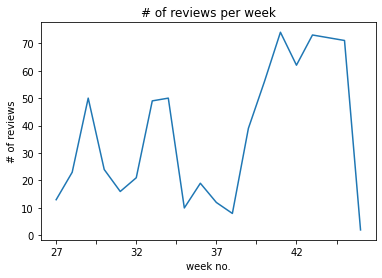

In [20]:
dfsb.weekno.value_counts().sort_index().plot()
plt.xlabel('week no.')
plt.ylabel('# of reviews')
plt.title('# of reviews per week')
plt.savefig('./Analysis/revperweek.jpg')

In [21]:
dfsb.weekno

0      27
1      27
2      27
3      27
4      27
       ..
758    45
759    45
760    45
763    46
764    46
Name: weekno, Length: 744, dtype: object

In [22]:
dfsb.head()

,content,date,like,place,tags,month,weekday,weekno
0,200629 모착친 제주여행 3일차(연청이 진청된 날)...#흑갈비국수매운맛 #흑갈...,2020-07-01,29,NaN,"['#흑갈비국수매운맛', '#흑갈비국수', '#돔베국수', '#하갈비국수', '#새...",7,Wednesday,27
1,#제주#제주도#jejuisland #새별오름#새빌카페#새빌#saebil#제주카페#우...,2020-07-02,56,Cafè 새빌,"['#제주', '#제주도', '#jejuisland', '#새별오름', '#새빌카페...",7,Thursday,27
2,삼겹살 갈치조림 고말수제비 산채비빔밥&제육 #7본가 본점 #짱갈비 #덕승식당#새빌 ...,2020-07-02,8,NaN,"['#7본가', '#짱갈비', '#덕승식당', '#새빌', '#참솔식당']",7,Thursday,27
3,_#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 👌.이런 #매력쟁이 😍.......,2020-07-02,44,애월읍 봉성리,"['#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도', '#매력쟁이', '#봉성...",7,Thursday,27
4,행복한 첫날이었다☘️...#제주도 #오설록 #새별오름 #새빌 #이호테우해변 #구구즈여행,2020-07-02,94,NaN,"['#제주도', '#오설록', '#새별오름', '#새빌', '#이호테우해변', '#...",7,Thursday,27


In [23]:
dfsb = dfsb[dfsb.place != '문어오빠게스트하우스']

In [24]:
dfsb.place.unique()

array([nan, 'Cafè 새빌', '애월읍 봉성리', '새별오름', 'Jeju', '제주도 크리스마스 박물관', '봉성리봄',
       'Jejuoffroad Jerazin Camp 제주오프로드 제라진캠프', '제주 귀덕 골방', 'Jeju-do',
       '항몽유적지', '제주도 애월읍', '수목원길 야시장', '제주애월', '노을해안도로', '근쌀남',
       '좋아 좋아 너무조아', 'Lacitpo Optical', '제주 애월', '환상의 섬 Jeju Island',
       'Jeju Island, South Korea - 제주도', '제주도 새별오름', '핑크뮬리꽃밭',
       '제주 협재 해수욕장', '제주도', '제주도 Jeju Island', 'Jeju Island, Korea',
       'Jeju, Korea', '제주신화월드 Jeju Shinhwa World', '자리돔횟집', '너와의첫여행',
       '제주까페 키친오즈', '제주도 곽지해수욕장', '협재해수욕장', '애월해안도로',
       'Seogwipo, Jeju Island, South Korea', '동명정류장', '바당고지',
       'Jeju Island', '제주도 우도', 'Gwangju, South Korea'], dtype=object)

In [25]:
dfsb = dfsb[dfsb.place != 'Lacitpo Optical']

In [3]:
dfsb.head()

,Unnamed: 0,content,date,like,place,tags
0,0,#새별오름혼자온 제주도의 새별오름 옆 카페 #새빌여전히 이쁜 새별오름불과 몇주전만해...,2020-11-09,0,Cafè 새빌,"['#새별오름혼자온', '#새빌여전히', '#핑크뮬리명소']"
1,1,“새별오름이 그렇게 예쁘다구?” 억새가 만발한 11월입니다. 그래서 그런지 억새를 ...,2020-11-09,10,새별오름,"['#새별오름', '#너무아픈데', '#도에서는', '#들불축제', '#구상중']"
2,2,오늘도 #시작 !!11시 부터 시작합니다~!! 😆.햄소세지 잔뜩 들어간 #부대찌개 ...,2020-11-09,29,소세지가게,"['#시작', '#부대찌개', '#육즙좔좔', '#소세지철판구이', '#한담해변',..."
3,3,월요일 .잘 쉬고 컴백!! .11시 부터 시작합니다~🤗.🥘🍚🥢🥄#제주부대찌개 #제주...,2020-11-09,27,소세지가게,"['#제주부대찌개', '#제주부대찌개맛집', '#라면사리', '#좋아', '#좋아요..."
4,4,제주 황금연휴로 렌트카도 없고하늘길도 끊겼고 에헤라디아~~노~~올~~자.거래처에서 ...,2020-11-08,9,NaN,"['#다온나무', '#해맑은영대네가게방문', '#생축🎉', '#화병', '#작품훔쳐..."


In [ ]:
dfsb.to_excel('./Preprocessed/saebil.xlsx')

In [127]:
dfbn = pd.read_excel('./Data/cafe_봄날카페.xlsx')
#dfbn.head()

In [128]:
dfbn.drop('Unnamed: 0', axis = 1, inplace = True)
#dfbn.head()

In [129]:
dfbn.like = dfbn.like.apply(lambda x : str(x).replace(',', ''))

In [130]:
dfbn.like = dfbn.like.astype('int')

In [131]:
dfbn.date = pd.to_datetime(dfbn.date)

In [132]:
dfbn['month'] = dfbn.date.dt.month
dfbn['weekday'] = dfbn.date.dt.strftime('%A')
dfbn['weekno'] = dfbn.date.dt.strftime('%V')

In [133]:
dfbn.sort_values('date', inplace = True)

In [134]:
dfbn.reset_index(inplace = True)
#dfbn.head()

In [135]:
dfbn = dfbn[dfbn.date.dt.year >= 2020]

In [136]:
dfbn.reset_index(inplace = True)
#dfbn.head()

In [137]:
dfbn.drop(['level_0', 'index'], axis = 1, inplace = True)

In [104]:
dfbn.place.unique()

array(['제주도 곽지해수욕장', 'Jeju', nan, '제주도 애월읍', '봄날', '한담해안산책로',
       '서울시 강북구 수유동', '제주도애월해안로', '환상의 섬 Jeju Island', '푸른섬 제주도', '참정형외과',
       '애월해안도로', 'Jeju-do', '제주도 서귀포', '제주도', '제주해남', '애월해안가', 'Jeongeup',
       'Gimhae', '제주봄날카페', 'Cafe Aewol Monsant 카페 애월 드 몽상', '카페 봄날',
       'Jeju-Do', '탐나는농장', '금능해수욕장', 'Maxim 모카다방', '제주도 몽상드애월',
       'Gangseo District, Seoul', '제주신화월드 Jeju Shinhwa World', '남해',
       'Up.side Coffee', '하이엔드 제주', '금능해변', '구모카페&구름책방', '카페애월로11',
       'Jeju Island, South Korea - 제주도', '서귀다원', '대학동', '차 마시는 뜰',
       'Siheung', 'Cafe Seren Di Bagel & Coffee', '제주시민속오일시장',
       '니모메빈티지라운지', '새별오름', 'Busan, South Korea', 'Blnk', '제주 애월바다',
       'Pohang', '애월해변', '세종특별자치시 고운동', '이호테우해변', '한담마을 장한철 산책로',
       '익산시 영등동', '5L2F', '곽지과물해수욕장', 'Cafe 봄날', '몽상드애월', 'Ulsan, Korea',
       '애월 한담', 'Jejudo', '제주도 한담해변', '제주도 Jeju Island', 'Sejong', '곽지해변',
       'Le Café Bomnal', '뚜쥬르 돌가마점', '한담해변', '카페 2085', '카페 단단', '수리키친',
       '제주 애월', '무지개해안도로', 'Boe

In [106]:
dfbn[dfbn.place == '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地']

,content,date,like,place,tags,month,weekday,weekno
685,육떡식당.오직 제주에만 있습니다❤️육전과 문어떡볶이가 끝내주는..중문 조용한 뒷골목...,2020-10-01,13,제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地,"['#제주도민', '#제주도민맛집', '#제주도민일상', '#몽상드애월', '#하이...",10,Thursday,40
707,육떡식당.오직 제주에만 있습니다❤️육전과 문어떡볶이가 끝내주는..중문 조용한 뒷골목...,2020-10-03,12,제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地,"['#제주도민', '#제주도민맛집', '#제주도민일상', '#몽상드애월', '#하이...",10,Saturday,40


In [138]:
dfbn = dfbn[dfbn.place != '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地']

In [113]:
len(dfbn.content.unique())

997

In [139]:
dfbn.drop_duplicates(inplace = True)

In [140]:
dfbn.drop_duplicates(subset = ['content'], inplace = True)

In [141]:
dfbn

,content,date,like,place,tags,month,weekday,weekno
0,제주에서 엄마밥이 그리울땐 #단정하고소박하게#단소 매일 단정하고 소박하게 온마음 다...,2020-07-01,49,제주도 곽지해수욕장,"['#단정하고소박하게', '#단소', '#애월맛집', '#애월핫플', '#단소', ...",7,Wednesday,27
1,#믿보찬_제주 4탄 카페추천편 ‼️1-2 #휴일로 - 중문쪽바다가 훤히 보이는 아주...,2020-07-02,231,Jeju,"['#믿보찬_제주', '#휴일로', '#대평밥상', '#인디고인디드', '#시루애월...",7,Thursday,27
2,모든게완벽했던우리여행🏝7월도뜨겁게 불태우고🔥멋지게 빛날 우리💪#제주봄날#봄날카페#어...,2020-07-02,73,NaN,"['#제주봄날', '#봄날카페', '#어딜가나전세냄', '#삼정브랜치', '#발라또...",7,Thursday,27
3,애월........#제주도 #일상 #커피맛집 #제주애월카페 #봄날카페#제주카페 #아...,2020-07-02,32,NaN,"['#제주도', '#일상', '#커피맛집', '#제주애월카페', '#봄날카페', '...",7,Thursday,27
4,카와이네...,2020-07-02,88,제주도 애월읍,[],7,Thursday,27
...,...,...,...,...,...,...,...,...
1103,#로드129흑돼지함박스테이크 성게크림파스타 jmt--#애월맛집 #제주도맛집 #곽지맛...,2020-11-09,3,NaN,"['#로드129흑돼지함박스테이크', '#애월맛집', '#제주도맛집', '#곽지맛집'...",11,Monday,46
1104,사진관한담 11/9(월) 오픈했습니다,2020-11-09,11,애월 한담,[],11,Monday,46
1106,저희 로드129는 신선한 제주산흑돼지를직접 덩어리째 받아 함박스테이크를 만들고 있어...,2020-11-09,3,Jeju,"['#로드129', '#애월먹방', '#애월카페', '#애월맛집', '#제주도', ...",11,Monday,46
1107,제주도 봄날카페 강아지 #제주도 #제주도여행 #꼬비친구 #강아지그램 #봄날카페 #제...,2020-11-09,8,NaN,"['#제주도', '#제주도여행', '#꼬비친구', '#강아지그램', '#봄날카페',...",11,Monday,46


In [142]:
dfbn.to_excel('./Preprocessed/bomnal.xlsx')

In [187]:
dfrn = pd.read_excel('./Data/cafe_지금이순간카페.xlsx')

In [188]:
dfrn.head()

,content,date,like,place,tags,month
0,.#제주도 #지금이순간카페 #애월 #협재해수욕장,2020-11-08,182,NaN,"['#제주도', '#지금이순간카페', '#애월', '#협재해수욕장']",11
1,진짜 이쁜데 안담기네....☹️☹️☹️☹️☹️☹️,2020-11-08,80,지금이순간카페,[],11
2,오늘 따라 열정이 엄청난 나으 찍새여....ㅋㅋㅋㅋㅋㅋㅋㅋ한번 찍어달라 말하면 멈추...,2020-11-08,87,지금이순간카페,[],11
3,애월카페~~카페를 너무 좋아하는 두 따님~~코로나때문에 정말 몇달만에 와본 카페 ㅜ...,2020-11-07,9,지금이순간카페,"['#애월카페', '#지금이순간카페', '#해안도로', '#한담해안산책로']",11
4,다음주 주말부터 무알콜 뱅쇼 드실 수 있습니다겨울철 감기에도 좋고 달달하니 깔끔하고...,2020-11-07,180,지금이순간카페,"['#제주도', '#지금이순간카페', '#뱅쇼', '#무알콜뱅쇼', '#겨울', '...",11


In [146]:
dfrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  442 non-null    object        
 1   date     442 non-null    datetime64[ns]
 2   like     442 non-null    int64         
 3   place    339 non-null    object        
 4   tags     442 non-null    object        
 5   month    442 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 20.8+ KB


In [189]:
dfrn['weekday'] = dfrn.date.dt.strftime('%A')
dfrn['weekno'] = dfrn.date.dt.strftime('%V')

In [190]:
dfrn.sort_values('date', inplace = True)

In [181]:
dfrn.head()

,content,date,like,place,tags,month,weekday,weekno
359,😗💨⠀⠀⠀⠀#지금이순간카페,2020-05-20,78,제주도 애월읍,['#지금이순간카페'],5,Wednesday,21
169,귀여운 계란후라이 꽃🌼...#제주도 #에코랜드 #한라산 #백록담 #애월 #지금이순간카페,2020-05-26,34,지금이순간카페,"['#제주도', '#에코랜드', '#한라산', '#백록담', '#애월', '#지금이...",5,Tuesday,22
441,날씨도 너무좋고 산책하기 좋은날 이네요!................#애월카페 #애...,2020-07-01,120,지금이순간카페,"['#애월카페', '#애월맛집', '#한담산책로', '#애월바다', '#지금이순간카...",7,Wednesday,27
440,#스탠다드푸들봉구#스탠다드푸들#제주스탠다드푸들#제주대형견#내이름은봉구#제주사는봉구 ...,2020-07-02,111,지금이순간카페,"['#스탠다드푸들봉구', '#스탠다드푸들', '#제주스탠다드푸들', '#제주대형견'...",7,Thursday,27
439,..1호 1349일2호 718일💕..이 엄마..얼굴 안나오게잘찍어 준거 같은데.근데...,2020-07-02,40,NaN,"['#아이랑제주도', '#제주도오션뷰', '#지금이순간카페', '#지한지우제주여행'...",7,Thursday,27


In [191]:
dfrn = dfrn[dfrn.month > 6]
dfrn.head()

,content,date,like,place,tags,month,weekday,weekno
441,날씨도 너무좋고 산책하기 좋은날 이네요!................#애월카페 #애...,2020-07-01,120,지금이순간카페,"['#애월카페', '#애월맛집', '#한담산책로', '#애월바다', '#지금이순간카...",7,Wednesday,27
440,#스탠다드푸들봉구#스탠다드푸들#제주스탠다드푸들#제주대형견#내이름은봉구#제주사는봉구 ...,2020-07-02,111,지금이순간카페,"['#스탠다드푸들봉구', '#스탠다드푸들', '#제주스탠다드푸들', '#제주대형견'...",7,Thursday,27
439,..1호 1349일2호 718일💕..이 엄마..얼굴 안나오게잘찍어 준거 같은데.근데...,2020-07-02,40,NaN,"['#아이랑제주도', '#제주도오션뷰', '#지금이순간카페', '#지한지우제주여행'...",7,Thursday,27
436,비온 뒤 맑음 🌥,2020-07-03,75,지금이순간카페,[],7,Friday,27
438,#지금이순간카페 #제주도 #애월 #카페 #오션뷰 #여행사진 #국내여행 #oceanv...,2020-07-03,23,지금이순간카페,"['#지금이순간카페', '#제주도', '#애월', '#카페', '#오션뷰', '#여...",7,Friday,27


In [192]:
dfrn.reset_index(inplace = True)

In [194]:
dfrn.head()

,content,date,like,place,tags,month,weekday,weekno
0,날씨도 너무좋고 산책하기 좋은날 이네요!................#애월카페 #애...,2020-07-01,120,지금이순간카페,"['#애월카페', '#애월맛집', '#한담산책로', '#애월바다', '#지금이순간카...",7,Wednesday,27
1,#스탠다드푸들봉구#스탠다드푸들#제주스탠다드푸들#제주대형견#내이름은봉구#제주사는봉구 ...,2020-07-02,111,지금이순간카페,"['#스탠다드푸들봉구', '#스탠다드푸들', '#제주스탠다드푸들', '#제주대형견'...",7,Thursday,27
2,..1호 1349일2호 718일💕..이 엄마..얼굴 안나오게잘찍어 준거 같은데.근데...,2020-07-02,40,NaN,"['#아이랑제주도', '#제주도오션뷰', '#지금이순간카페', '#지한지우제주여행'...",7,Thursday,27
3,비온 뒤 맑음 🌥,2020-07-03,75,지금이순간카페,[],7,Friday,27
4,#지금이순간카페 #제주도 #애월 #카페 #오션뷰 #여행사진 #국내여행 #oceanv...,2020-07-03,23,지금이순간카페,"['#지금이순간카페', '#제주도', '#애월', '#카페', '#오션뷰', '#여...",7,Friday,27


In [195]:
dfrn.drop_duplicates(subset = ['content'], inplace = True)

In [196]:
dfrn.head()

,content,date,like,place,tags,month,weekday,weekno
0,날씨도 너무좋고 산책하기 좋은날 이네요!................#애월카페 #애...,2020-07-01,120,지금이순간카페,"['#애월카페', '#애월맛집', '#한담산책로', '#애월바다', '#지금이순간카...",7,Wednesday,27
1,#스탠다드푸들봉구#스탠다드푸들#제주스탠다드푸들#제주대형견#내이름은봉구#제주사는봉구 ...,2020-07-02,111,지금이순간카페,"['#스탠다드푸들봉구', '#스탠다드푸들', '#제주스탠다드푸들', '#제주대형견'...",7,Thursday,27
2,..1호 1349일2호 718일💕..이 엄마..얼굴 안나오게잘찍어 준거 같은데.근데...,2020-07-02,40,NaN,"['#아이랑제주도', '#제주도오션뷰', '#지금이순간카페', '#지한지우제주여행'...",7,Thursday,27
3,비온 뒤 맑음 🌥,2020-07-03,75,지금이순간카페,[],7,Friday,27
4,#지금이순간카페 #제주도 #애월 #카페 #오션뷰 #여행사진 #국내여행 #oceanv...,2020-07-03,23,지금이순간카페,"['#지금이순간카페', '#제주도', '#애월', '#카페', '#오션뷰', '#여...",7,Friday,27


In [198]:
dfrn = dfrn.reset_index(drop = True)
dfrn

,content,date,like,place,tags,month,weekday,weekno
0,날씨도 너무좋고 산책하기 좋은날 이네요!................#애월카페 #애...,2020-07-01,120,지금이순간카페,"['#애월카페', '#애월맛집', '#한담산책로', '#애월바다', '#지금이순간카...",7,Wednesday,27
1,#스탠다드푸들봉구#스탠다드푸들#제주스탠다드푸들#제주대형견#내이름은봉구#제주사는봉구 ...,2020-07-02,111,지금이순간카페,"['#스탠다드푸들봉구', '#스탠다드푸들', '#제주스탠다드푸들', '#제주대형견'...",7,Thursday,27
2,..1호 1349일2호 718일💕..이 엄마..얼굴 안나오게잘찍어 준거 같은데.근데...,2020-07-02,40,NaN,"['#아이랑제주도', '#제주도오션뷰', '#지금이순간카페', '#지한지우제주여행'...",7,Thursday,27
3,비온 뒤 맑음 🌥,2020-07-03,75,지금이순간카페,[],7,Friday,27
4,#지금이순간카페 #제주도 #애월 #카페 #오션뷰 #여행사진 #국내여행 #oceanv...,2020-07-03,23,지금이순간카페,"['#지금이순간카페', '#제주도', '#애월', '#카페', '#오션뷰', '#여...",7,Friday,27
...,...,...,...,...,...,...,...,...
415,다음주 주말부터 무알콜 뱅쇼 드실 수 있습니다겨울철 감기에도 좋고 달달하니 깔끔하고...,2020-11-07,180,지금이순간카페,"['#제주도', '#지금이순간카페', '#뱅쇼', '#무알콜뱅쇼', '#겨울', '...",11,Saturday,45
416,애월카페~~카페를 너무 좋아하는 두 따님~~코로나때문에 정말 몇달만에 와본 카페 ㅜ...,2020-11-07,9,지금이순간카페,"['#애월카페', '#지금이순간카페', '#해안도로', '#한담해안산책로']",11,Saturday,45
417,오늘 따라 열정이 엄청난 나으 찍새여....ㅋㅋㅋㅋㅋㅋㅋㅋ한번 찍어달라 말하면 멈추...,2020-11-08,87,지금이순간카페,[],11,Sunday,45
418,진짜 이쁜데 안담기네....☹️☹️☹️☹️☹️☹️,2020-11-08,80,지금이순간카페,[],11,Sunday,45


In [199]:
dfrn.to_excel('./Preprocessed/지금이순간.xlsx')

In [200]:
dfdc = pd.read_excel('./Data/cafe_돌카롱.xlsx')
dfdc.head()

,Unnamed: 0,content,date,like,place,tags
0,0,ㅡ#꽃언니커피수혈#제주3종세트#한리봉병따개#용망진제주#자석마그네틱#돌카롱..뚜지니가...,2020-11-09,7,NaN,"['#꽃언니커피수혈', '#제주3종세트', '#한리봉병따개', '#용망진제주', '..."
1,1,댕그리안경💙,2020-11-09,50,제주도 Jeju Island,[]
2,2,가을 제주#....#제주도여행 #혼자여행 #가을제주 #돌카롱,2020-11-09,4,NaN,"['#....', '#제주도여행', '#혼자여행', '#가을제주', '#돌카롱']"
3,3,제주바람 무시하지 말라~ 오늘의 교훈😹,2020-11-09,17,NaN,[]
4,4,제주밤바다너~~~무 일찍문닫는다아쉽게.#곽지해수욕장#애월빵공장#제주in드라마2015...,2020-11-09,10,NaN,"['#곽지해수욕장', '#애월빵공장', '#제주in드라마2015', '#돌카롱']"


In [201]:
dfdc.drop('Unnamed: 0', axis = 1, inplace = True)
dfdc.head()

,content,date,like,place,tags
0,ㅡ#꽃언니커피수혈#제주3종세트#한리봉병따개#용망진제주#자석마그네틱#돌카롱..뚜지니가...,2020-11-09,7,NaN,"['#꽃언니커피수혈', '#제주3종세트', '#한리봉병따개', '#용망진제주', '..."
1,댕그리안경💙,2020-11-09,50,제주도 Jeju Island,[]
2,가을 제주#....#제주도여행 #혼자여행 #가을제주 #돌카롱,2020-11-09,4,NaN,"['#....', '#제주도여행', '#혼자여행', '#가을제주', '#돌카롱']"
3,제주바람 무시하지 말라~ 오늘의 교훈😹,2020-11-09,17,NaN,[]
4,제주밤바다너~~~무 일찍문닫는다아쉽게.#곽지해수욕장#애월빵공장#제주in드라마2015...,2020-11-09,10,NaN,"['#곽지해수욕장', '#애월빵공장', '#제주in드라마2015', '#돌카롱']"


In [202]:
dfdc.sort_values('date', inplace = True)
dfdc.head()

,content,date,like,place,tags
283,여행이 끝나간다 뱅기시간 기다리며 까페에 앉아 사진들 뒤적뒤적~비가 많이 올거라해서...,2019-09-03,22,제주도,"['#또비가온다', '#번개도친다ㅠ', '#뱅기뜨겠지😢', '#제주여행', '#늦은..."
531,#제주도 #돌카롱#마카롱,2020-06-14,4,NaN,"['#제주도', '#돌카롱', '#마카롱']"
952,#돌카롱 #정원산책 #사려니숲길,2020-06-20,0,돌카롱,"['#돌카롱', '#정원산책', '#사려니숲길']"
970,Jeju.몇십년만에 온 제주. 외국 같네.#jejuisland #돌카롱#판포포구 #...,2020-07-01,9,NaN,"['#jejuisland', '#돌카롱', '#판포포구', '#광해애월', '#제주..."
969,여기 음식이 저어어어엉말 정갈하게 먹기좋게 나왔다. 맛도 굳👍 식후 마카롱 냠냠.....,2020-07-02,14,NaN,"['#데일리', '#일상소통', '#소통', '#소통해요', '#소통스타그램', '..."


In [204]:
dfdc.like = dfdc.like.apply(lambda x : str(x).replace(',', ''))

In [205]:
dfdc.like = dfdc.like.astype('int')

In [217]:
dfdc.date = pd.to_datetime(dfdc.date)

In [218]:
dfdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 283 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  970 non-null    object        
 1   date     971 non-null    datetime64[ns]
 2   like     971 non-null    int64         
 3   place    470 non-null    object        
 4   tags     971 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.5+ KB


In [220]:
dfdc.drop(['weekday', 'weekno'], axis = 1, inplace = True)

In [221]:
dfdc['month'] = dfdc.date.dt.month
dfdc['weekday'] = dfdc.date.dt.strftime('%A')
dfdc['weekno'] = dfdc.date.dt.strftime('%V')

In [222]:
dfdc.head()

,content,date,like,place,tags,month,weekday,weekno
283,여행이 끝나간다 뱅기시간 기다리며 까페에 앉아 사진들 뒤적뒤적~비가 많이 올거라해서...,2019-09-03,22,제주도,"['#또비가온다', '#번개도친다ㅠ', '#뱅기뜨겠지😢', '#제주여행', '#늦은...",9,Tuesday,36
531,#제주도 #돌카롱#마카롱,2020-06-14,4,NaN,"['#제주도', '#돌카롱', '#마카롱']",6,Sunday,24
952,#돌카롱 #정원산책 #사려니숲길,2020-06-20,0,돌카롱,"['#돌카롱', '#정원산책', '#사려니숲길']",6,Saturday,25
970,Jeju.몇십년만에 온 제주. 외국 같네.#jejuisland #돌카롱#판포포구 #...,2020-07-01,9,NaN,"['#jejuisland', '#돌카롱', '#판포포구', '#광해애월', '#제주...",7,Wednesday,27
969,여기 음식이 저어어어엉말 정갈하게 먹기좋게 나왔다. 맛도 굳👍 식후 마카롱 냠냠.....,2020-07-02,14,NaN,"['#데일리', '#일상소통', '#소통', '#소통해요', '#소통스타그램', '...",7,Thursday,27


In [223]:
dfdc = dfdc[dfdc.date.dt.month > 6]

In [225]:
dfdc = dfdc[dfdc.date.dt.year == 2020]
dfdc.head()

,content,date,like,place,tags,month,weekday,weekno
970,Jeju.몇십년만에 온 제주. 외국 같네.#jejuisland #돌카롱#판포포구 #...,2020-07-01,9,NaN,"['#jejuisland', '#돌카롱', '#판포포구', '#광해애월', '#제주...",7,Wednesday,27
969,여기 음식이 저어어어엉말 정갈하게 먹기좋게 나왔다. 맛도 굳👍 식후 마카롱 냠냠.....,2020-07-02,14,NaN,"['#데일리', '#일상소통', '#소통', '#소통해요', '#소통스타그램', '...",7,Thursday,27
967,",오 갠춘하군#돌카롱 #마카롱 #딸기요거트 #😁 #식후 #간식",2020-07-02,27,NaN,"['#돌카롱', '#마카롱', '#딸기요거트', '#😁', '#식후', '#간식']",7,Thursday,27
968,#제주도여행 #이호테우해변 #말등대 #돌카롱,2020-07-02,13,NaN,"['#제주도여행', '#이호테우해변', '#말등대', '#돌카롱']",7,Thursday,27
965,.#돌카롱 #JMT도시의 마카롱 꼬끄는 겉바속촉이라면돌카롱은 전체적으로 촉촉하고 무...,2020-07-02,14,NaN,"['#돌카롱', '#JMT도시의', '#jeju', '#korea', '#macar...",7,Thursday,27


In [226]:
dfdc.drop_duplicates(subset = ['content'], inplace = True)
dfdc

,content,date,like,place,tags,month,weekday,weekno
970,Jeju.몇십년만에 온 제주. 외국 같네.#jejuisland #돌카롱#판포포구 #...,2020-07-01,9,NaN,"['#jejuisland', '#돌카롱', '#판포포구', '#광해애월', '#제주...",7,Wednesday,27
969,여기 음식이 저어어어엉말 정갈하게 먹기좋게 나왔다. 맛도 굳👍 식후 마카롱 냠냠.....,2020-07-02,14,NaN,"['#데일리', '#일상소통', '#소통', '#소통해요', '#소통스타그램', '...",7,Thursday,27
967,",오 갠춘하군#돌카롱 #마카롱 #딸기요거트 #😁 #식후 #간식",2020-07-02,27,NaN,"['#돌카롱', '#마카롱', '#딸기요거트', '#😁', '#식후', '#간식']",7,Thursday,27
968,#제주도여행 #이호테우해변 #말등대 #돌카롱,2020-07-02,13,NaN,"['#제주도여행', '#이호테우해변', '#말등대', '#돌카롱']",7,Thursday,27
965,.#돌카롱 #JMT도시의 마카롱 꼬끄는 겉바속촉이라면돌카롱은 전체적으로 촉촉하고 무...,2020-07-02,14,NaN,"['#돌카롱', '#JMT도시의', '#jeju', '#korea', '#macar...",7,Thursday,27
...,...,...,...,...,...,...,...,...
4,제주밤바다너~~~무 일찍문닫는다아쉽게.#곽지해수욕장#애월빵공장#제주in드라마2015...,2020-11-09,10,NaN,"['#곽지해수욕장', '#애월빵공장', '#제주in드라마2015', '#돌카롱']",11,Monday,46
3,제주바람 무시하지 말라~ 오늘의 교훈😹,2020-11-09,17,NaN,[],11,Monday,46
2,가을 제주#....#제주도여행 #혼자여행 #가을제주 #돌카롱,2020-11-09,4,NaN,"['#....', '#제주도여행', '#혼자여행', '#가을제주', '#돌카롱']",11,Monday,46
1,댕그리안경💙,2020-11-09,50,제주도 Jeju Island,[],11,Monday,46


In [227]:
dfdc = dfdc.reset_index(drop = True)
dfdc

,content,date,like,place,tags,month,weekday,weekno
0,Jeju.몇십년만에 온 제주. 외국 같네.#jejuisland #돌카롱#판포포구 #...,2020-07-01,9,NaN,"['#jejuisland', '#돌카롱', '#판포포구', '#광해애월', '#제주...",7,Wednesday,27
1,여기 음식이 저어어어엉말 정갈하게 먹기좋게 나왔다. 맛도 굳👍 식후 마카롱 냠냠.....,2020-07-02,14,NaN,"['#데일리', '#일상소통', '#소통', '#소통해요', '#소통스타그램', '...",7,Thursday,27
2,",오 갠춘하군#돌카롱 #마카롱 #딸기요거트 #😁 #식후 #간식",2020-07-02,27,NaN,"['#돌카롱', '#마카롱', '#딸기요거트', '#😁', '#식후', '#간식']",7,Thursday,27
3,#제주도여행 #이호테우해변 #말등대 #돌카롱,2020-07-02,13,NaN,"['#제주도여행', '#이호테우해변', '#말등대', '#돌카롱']",7,Thursday,27
4,.#돌카롱 #JMT도시의 마카롱 꼬끄는 겉바속촉이라면돌카롱은 전체적으로 촉촉하고 무...,2020-07-02,14,NaN,"['#돌카롱', '#JMT도시의', '#jeju', '#korea', '#macar...",7,Thursday,27
...,...,...,...,...,...,...,...,...
948,제주밤바다너~~~무 일찍문닫는다아쉽게.#곽지해수욕장#애월빵공장#제주in드라마2015...,2020-11-09,10,NaN,"['#곽지해수욕장', '#애월빵공장', '#제주in드라마2015', '#돌카롱']",11,Monday,46
949,제주바람 무시하지 말라~ 오늘의 교훈😹,2020-11-09,17,NaN,[],11,Monday,46
950,가을 제주#....#제주도여행 #혼자여행 #가을제주 #돌카롱,2020-11-09,4,NaN,"['#....', '#제주도여행', '#혼자여행', '#가을제주', '#돌카롱']",11,Monday,46
951,댕그리안경💙,2020-11-09,50,제주도 Jeju Island,[],11,Monday,46


In [228]:
dfdc.to_excel('./Preprocessed/dolcaron.xlsx')

In [229]:
dftb = pd.read_excel('./Data/cafe_트라이브.xlsx')
dftb.head()

,Unnamed: 0,content,date,like,place,tags
0,0,제주도마지막날#제주 #제주도 #제주여행 #제주핫플 #새별오름 #오름 #날씨흐림 #애...,2020-11-09,8,NaN,"['#제주', '#제주도', '#제주여행', '#제주핫플', '#새별오름', '#오..."
1,1,#제주여행✈️ #제주오션뷰🌅 #일몰맛집#제주애월카페☕ #트라이브제주도 제주시 애월읍...,2020-11-09,14,NaN,"['#제주여행✈️', '#제주오션뷰🌅', '#일몰맛집', '#제주애월카페☕', '#..."
2,2,애월 노을 맛집은 여기에요#제주카페 #애월카페#트라이브#아아메 #아인슈페너 #레이디...,2020-11-09,2,NaN,"['#제주카페', '#애월카페', '#트라이브', '#아아메', '#아인슈페너', ..."
3,3,애월 🌊 바다를 보며 냠냠 한라봉 🍊소르베와 구좌 당근케이크🥕 너무 맛있쪙 #제주도...,2020-11-08,2,트라이브,"['#제주도', '#제주애월카페', '#트라이브', '#애월카페', '#바다뷰카페'..."
4,4,#장미쉘바스키아 #바스키아 #정담은보쌈 #cigarettesaftersex #트라이...,2020-11-08,18,NaN,"['#장미쉘바스키아', '#바스키아', '#정담은보쌈', '#cigarettesaf..."


In [230]:
dftb.drop('Unnamed: 0', axis = 1, inplace = True)
dftb.head()

,content,date,like,place,tags
0,제주도마지막날#제주 #제주도 #제주여행 #제주핫플 #새별오름 #오름 #날씨흐림 #애...,2020-11-09,8,NaN,"['#제주', '#제주도', '#제주여행', '#제주핫플', '#새별오름', '#오..."
1,#제주여행✈️ #제주오션뷰🌅 #일몰맛집#제주애월카페☕ #트라이브제주도 제주시 애월읍...,2020-11-09,14,NaN,"['#제주여행✈️', '#제주오션뷰🌅', '#일몰맛집', '#제주애월카페☕', '#..."
2,애월 노을 맛집은 여기에요#제주카페 #애월카페#트라이브#아아메 #아인슈페너 #레이디...,2020-11-09,2,NaN,"['#제주카페', '#애월카페', '#트라이브', '#아아메', '#아인슈페너', ..."
3,애월 🌊 바다를 보며 냠냠 한라봉 🍊소르베와 구좌 당근케이크🥕 너무 맛있쪙 #제주도...,2020-11-08,2,트라이브,"['#제주도', '#제주애월카페', '#트라이브', '#애월카페', '#바다뷰카페'..."
4,#장미쉘바스키아 #바스키아 #정담은보쌈 #cigarettesaftersex #트라이...,2020-11-08,18,NaN,"['#장미쉘바스키아', '#바스키아', '#정담은보쌈', '#cigarettesaf..."


In [231]:
dftb.like = dftb.like.apply(lambda x : str(x).replace(',', ''))
dftb.like = dftb.like.astype('int')

In [232]:
dftb.date = pd.to_datetime(dftb.date)

In [233]:
dftb.sort_values('date', inplace = True)

In [234]:
dftb.head()

,content,date,like,place,tags
234,역시👍맛있다#tribe_restaurant#트라이브#트라이브레스토랑#라자냐맛집#스테...,2020-07-01,6,NaN,"['#tribe_restaurant', '#트라이브', '#트라이브레스토랑', '#..."
233,독종들이야 증말,2020-07-03,48,NaN,[]
232,"경고등도 색깔로 구분할 수 있다!!?자동차 경고등의 빨강, 노랑, 초록(파랑) 세 ...",2020-07-03,30,NaN,"['#트라이브⠀', '#중고차필요할땐', '#트라이브', '#자동차구독', '#국내..."
231,제주3일차🍊..#busan #jeju #aewol #tribe #travel #da...,2020-07-04,36,NaN,"['#busan', '#jeju', '#aewol', '#tribe', '#trav..."
230,사장님 금손 늘 다 맛있어ㅜㅜ#트라이브레스토랑 #트라이브#tribe_restaura...,2020-07-04,8,"Daegu, South Korea","['#트라이브레스토랑', '#트라이브', '#tribe_restaurant', '#..."


In [235]:
dftb['month'] = dftb.date.dt.month
dftb['weekday'] = dftb.date.dt.strftime('%A')
dftb['weekno'] = dftb.date.dt.strftime('%V')

In [237]:
dftb.drop_duplicates(subset = ['content'], inplace = True)

In [238]:
dftb = dftb.reset_index(drop = True)
dftb

,content,date,like,place,tags,month,weekday,weekno
0,역시👍맛있다#tribe_restaurant#트라이브#트라이브레스토랑#라자냐맛집#스테...,2020-07-01,6,NaN,"['#tribe_restaurant', '#트라이브', '#트라이브레스토랑', '#...",7,Wednesday,27
1,독종들이야 증말,2020-07-03,48,NaN,[],7,Friday,27
2,"경고등도 색깔로 구분할 수 있다!!?자동차 경고등의 빨강, 노랑, 초록(파랑) 세 ...",2020-07-03,30,NaN,"['#트라이브⠀', '#중고차필요할땐', '#트라이브', '#자동차구독', '#국내...",7,Friday,27
3,제주3일차🍊..#busan #jeju #aewol #tribe #travel #da...,2020-07-04,36,NaN,"['#busan', '#jeju', '#aewol', '#tribe', '#trav...",7,Saturday,27
4,사장님 금손 늘 다 맛있어ㅜㅜ#트라이브레스토랑 #트라이브#tribe_restaura...,2020-07-04,8,"Daegu, South Korea","['#트라이브레스토랑', '#트라이브', '#tribe_restaurant', '#...",7,Saturday,27
...,...,...,...,...,...,...,...,...
228,#장미쉘바스키아 #바스키아 #정담은보쌈 #cigarettesaftersex #트라이...,2020-11-08,18,NaN,"['#장미쉘바스키아', '#바스키아', '#정담은보쌈', '#cigarettesaf...",11,Sunday,45
229,애월 🌊 바다를 보며 냠냠 한라봉 🍊소르베와 구좌 당근케이크🥕 너무 맛있쪙 #제주도...,2020-11-08,2,트라이브,"['#제주도', '#제주애월카페', '#트라이브', '#애월카페', '#바다뷰카페'...",11,Sunday,45
230,애월 노을 맛집은 여기에요#제주카페 #애월카페#트라이브#아아메 #아인슈페너 #레이디...,2020-11-09,2,NaN,"['#제주카페', '#애월카페', '#트라이브', '#아아메', '#아인슈페너', ...",11,Monday,46
231,#제주여행✈️ #제주오션뷰🌅 #일몰맛집#제주애월카페☕ #트라이브제주도 제주시 애월읍...,2020-11-09,14,NaN,"['#제주여행✈️', '#제주오션뷰🌅', '#일몰맛집', '#제주애월카페☕', '#...",11,Monday,46


In [239]:
dftb.to_excel('./Preprocessed/tribe.xlsx')

In [240]:
dfrm = pd.read_excel('./Data/cafe_리치망고애월.xlsx')
dfrm.head()

,Unnamed: 0,content,date,like,place,tags
0,0,리치망고.#제주 #제주도 #제주도여행#제주도여행코스 #제주도맛집#제주맛집 #리치망고...,2020-11-09,6,리치망고,"['#제주', '#제주도', '#제주도여행', '#제주도여행코스', '#제주도맛집'..."
1,1,거의 1년만에 비행기를 탄듯 하다.제주에서의 첫날~#제주 애월 #김포공항 #큐티파이...,2020-11-08,10,NaN,"['#제주', '#김포공항', '#큐티파이', '#명리동식당애월점', '#리치망고애월']"
2,2,미루고 미루다 지금올리기제주도 1일차😍5년만에 오빠랑 처음가는 #제주도 💑진짜 간단...,2020-11-07,22,제주도 애월읍,"['#제주도', '#리치망고애월', '#루프탑수영장']"
3,3,#리치망고 #리치망고애월,2020-11-06,0,NaN,"['#리치망고', '#리치망고애월']"
4,4,딜달한 리치망고 들고 애월 해안도로 산책_ 너무 예쁜 바다와 하늘🏝#리치망고#리치망...,2020-11-06,4,애월해안도로,"['#리치망고', '#리치망고애월', '#애월해안도로', '#제주도', '#제주도신..."


In [241]:
dfrm.drop('Unnamed: 0', axis = 1, inplace = True)

In [242]:
dfrm.like = dfrm.like.apply(lambda x : str(x).replace(',', ''))
dfrm.like = dfrm.like.astype('int')

In [243]:
dfrm.date = pd.to_datetime(dfrm.date)

In [244]:
dfrm.sort_values('date', inplace = True)
dfrm.head()

,content,date,like,place,tags
179,사진찍을려는데 바지가 훌러덩내려가서 허허 웃는중이에요 ㅋㅋㅋ(아무도 못봤을꺼야......,2020-07-01,11,애월해안도로,['#리치망고애월']
178,인스타를 잘활용을 못하는분들이좋아요수 집착을 하시더라구요 🤣⠀좋아요수가 다가 아닙니...,2020-07-02,0,Jeju,[]
176,#리치망고 여전하다 #맛집인정 -ㅋ이거 먹으러 일정에도 없는 애월해안도로로 출발 ㅋ...,2020-07-04,9,애월해안도로,"['#리치망고', '#맛집인정', '#제주맛집추천', '#리치망고애월', '#망고라쉬']"
177,언제나 감동🥭.먹을때 마다 감동하는 리치망고🥭 넘나 상콤이 하네😍#리치망고#리치망고...,2020-07-04,11,리치망고,"['#리치망고', '#리치망고애월', '#제주망고', '#스페셜망고', '#망고맛집..."
175,#이마트제주#애월해안도로#리치망고애월#김만복김밥#만득이펜션#금능해수욕장첫 날 마무리...,2020-07-05,25,NaN,"['#이마트제주', '#애월해안도로', '#리치망고애월', '#김만복김밥', '#만..."


In [246]:
dfrm.drop_duplicates(subset = ['content'], inplace = True)
dfrm

,content,date,like,place,tags
179,사진찍을려는데 바지가 훌러덩내려가서 허허 웃는중이에요 ㅋㅋㅋ(아무도 못봤을꺼야......,2020-07-01,11,애월해안도로,['#리치망고애월']
178,인스타를 잘활용을 못하는분들이좋아요수 집착을 하시더라구요 🤣⠀좋아요수가 다가 아닙니...,2020-07-02,0,Jeju,[]
176,#리치망고 여전하다 #맛집인정 -ㅋ이거 먹으러 일정에도 없는 애월해안도로로 출발 ㅋ...,2020-07-04,9,애월해안도로,"['#리치망고', '#맛집인정', '#제주맛집추천', '#리치망고애월', '#망고라쉬']"
177,언제나 감동🥭.먹을때 마다 감동하는 리치망고🥭 넘나 상콤이 하네😍#리치망고#리치망고...,2020-07-04,11,리치망고,"['#리치망고', '#리치망고애월', '#제주망고', '#스페셜망고', '#망고맛집..."
175,#이마트제주#애월해안도로#리치망고애월#김만복김밥#만득이펜션#금능해수욕장첫 날 마무리...,2020-07-05,25,NaN,"['#이마트제주', '#애월해안도로', '#리치망고애월', '#김만복김밥', '#만..."
...,...,...,...,...,...
4,딜달한 리치망고 들고 애월 해안도로 산책_ 너무 예쁜 바다와 하늘🏝#리치망고#리치망...,2020-11-06,4,애월해안도로,"['#리치망고', '#리치망고애월', '#애월해안도로', '#제주도', '#제주도신..."
3,#리치망고 #리치망고애월,2020-11-06,0,NaN,"['#리치망고', '#리치망고애월']"
2,미루고 미루다 지금올리기제주도 1일차😍5년만에 오빠랑 처음가는 #제주도 💑진짜 간단...,2020-11-07,22,제주도 애월읍,"['#제주도', '#리치망고애월', '#루프탑수영장']"
1,거의 1년만에 비행기를 탄듯 하다.제주에서의 첫날~#제주 애월 #김포공항 #큐티파이...,2020-11-08,10,NaN,"['#제주', '#김포공항', '#큐티파이', '#명리동식당애월점', '#리치망고애월']"


In [247]:
dfrm = dfrm.reset_index(drop = True)
dfrm

,content,date,like,place,tags
0,사진찍을려는데 바지가 훌러덩내려가서 허허 웃는중이에요 ㅋㅋㅋ(아무도 못봤을꺼야......,2020-07-01,11,애월해안도로,['#리치망고애월']
1,인스타를 잘활용을 못하는분들이좋아요수 집착을 하시더라구요 🤣⠀좋아요수가 다가 아닙니...,2020-07-02,0,Jeju,[]
2,#리치망고 여전하다 #맛집인정 -ㅋ이거 먹으러 일정에도 없는 애월해안도로로 출발 ㅋ...,2020-07-04,9,애월해안도로,"['#리치망고', '#맛집인정', '#제주맛집추천', '#리치망고애월', '#망고라쉬']"
3,언제나 감동🥭.먹을때 마다 감동하는 리치망고🥭 넘나 상콤이 하네😍#리치망고#리치망고...,2020-07-04,11,리치망고,"['#리치망고', '#리치망고애월', '#제주망고', '#스페셜망고', '#망고맛집..."
4,#이마트제주#애월해안도로#리치망고애월#김만복김밥#만득이펜션#금능해수욕장첫 날 마무리...,2020-07-05,25,NaN,"['#이마트제주', '#애월해안도로', '#리치망고애월', '#김만복김밥', '#만..."
...,...,...,...,...,...
175,딜달한 리치망고 들고 애월 해안도로 산책_ 너무 예쁜 바다와 하늘🏝#리치망고#리치망...,2020-11-06,4,애월해안도로,"['#리치망고', '#리치망고애월', '#애월해안도로', '#제주도', '#제주도신..."
176,#리치망고 #리치망고애월,2020-11-06,0,NaN,"['#리치망고', '#리치망고애월']"
177,미루고 미루다 지금올리기제주도 1일차😍5년만에 오빠랑 처음가는 #제주도 💑진짜 간단...,2020-11-07,22,제주도 애월읍,"['#제주도', '#리치망고애월', '#루프탑수영장']"
178,거의 1년만에 비행기를 탄듯 하다.제주에서의 첫날~#제주 애월 #김포공항 #큐티파이...,2020-11-08,10,NaN,"['#제주', '#김포공항', '#큐티파이', '#명리동식당애월점', '#리치망고애월']"


In [248]:
dfrm['month'] = dfrm.date.dt.month
dfrm['weekday'] = dfrm.date.dt.strftime('%A')
dfrm['weekno'] = dfrm.date.dt.strftime('%V')
dfrm.head()

,content,date,like,place,tags,month,weekday,weekno
0,사진찍을려는데 바지가 훌러덩내려가서 허허 웃는중이에요 ㅋㅋㅋ(아무도 못봤을꺼야......,2020-07-01,11,애월해안도로,['#리치망고애월'],7,Wednesday,27
1,인스타를 잘활용을 못하는분들이좋아요수 집착을 하시더라구요 🤣⠀좋아요수가 다가 아닙니...,2020-07-02,0,Jeju,[],7,Thursday,27
2,#리치망고 여전하다 #맛집인정 -ㅋ이거 먹으러 일정에도 없는 애월해안도로로 출발 ㅋ...,2020-07-04,9,애월해안도로,"['#리치망고', '#맛집인정', '#제주맛집추천', '#리치망고애월', '#망고라쉬']",7,Saturday,27
3,언제나 감동🥭.먹을때 마다 감동하는 리치망고🥭 넘나 상콤이 하네😍#리치망고#리치망고...,2020-07-04,11,리치망고,"['#리치망고', '#리치망고애월', '#제주망고', '#스페셜망고', '#망고맛집...",7,Saturday,27
4,#이마트제주#애월해안도로#리치망고애월#김만복김밥#만득이펜션#금능해수욕장첫 날 마무리...,2020-07-05,25,NaN,"['#이마트제주', '#애월해안도로', '#리치망고애월', '#김만복김밥', '#만...",7,Sunday,27


In [249]:
dfrm.to_excel('./Preprocessed/richmango.xlsx')

In [250]:
dfaw = pd.read_excel('./Data/cafe_애월더선셋.xlsx')
dfaw.head()

,Unnamed: 0,content,date,like,place,tags
0,0,💃🏻🕺🏻,2020-11-09,4,Cafe Aewol Monsant 카페 애월 드 몽상,[]
1,1,"제주도 뜨고있는 핫플 < #노라바 > 🍜🦪해물라면 8,000 해물이 너무 가득가득😆...",2020-11-09,13,애월해안도로,"['#노라바', '#제주맛집', '#제주도맛집', '#제주도해물라면', '#해물라면..."
2,2,🧡짧은 일정😑그래도 같이 일하는 동료들의 배려덕분에후다닥 갔다온 제주여긴 일몰맛집 ...,2020-11-09,23,애월더선셋,"['#제주', '#제주도', '#제주여행', '#여행', '#제주도여행', '#애월..."
3,3,나도 뽀또존에서 사진찌금✌,2020-11-09,47,NaN,[]
4,4,"돌, 여자, 바람바람바람바람바람×100000 #제주🏝#제주도#제주카페#애월더선셋",2020-11-09,33,Jeju Island,"['#제주🏝', '#제주도', '#제주카페', '#애월더선셋']"


In [251]:
dfaw.drop('Unnamed: 0', axis = 1, inplace = True)

In [252]:
dfaw.like = dfaw.like.apply(lambda x : str(x).replace(',', ''))
dfaw.like = dfaw.like.astype('int')

In [253]:
dfaw.date = pd.to_datetime(dfaw.date)

In [255]:
dfaw.sort_values('date', inplace = True)
dfaw.head()

,content,date,like,place,tags
782,#애월까페#제주사랑#애월해안도로#오오티디룩#바다보이는 카페#까페투어☕️# 바다보이는...,2017-09-16,75,제주도 애월읍,"['#애월까페', '#제주사랑', '#애월해안도로', '#오오티디룩', '#바다보이..."
1682,#제주여행#비오는제주도#바다속고등어쌈밥#애월더선셋#여행스타그램,2017-10-16,42,제주도 곽지과물해변,"['#제주여행', '#비오는제주도', '#바다속고등어쌈밥', '#애월더선셋', '#..."
248,너무 예쁜 애월 바다 ❤️#제주 #애월 #제주애월 #애월더선셋 #제주여행,2019-06-20,0,NaN,"['#제주', '#애월', '#제주애월', '#애월더선셋', '#제주여행']"
1262,19.09.04제주도여행 성공적✈️⠀•고기국수•제주해물탕•제주흑돼지•애월더선셋•쪼끌락,2019-09-04,0,NaN,[]
347,#제주도 #제주도여행 #애월 #애월더선셋,2020-02-08,39,NaN,"['#제주도', '#제주도여행', '#애월', '#애월더선셋']"


In [257]:
dfaw = dfaw[(dfaw.date.dt.month > 6) & (dfaw.date.dt.year == 2020)]
dfaw.head()

,content,date,like,place,tags
2058,애월읍~여기 서핑 천국이네#제주도#한담해안산책로 #애월더선셋 #여행에미치다#여행그램...,2020-07-01,0,애월더선셋,"['#제주도', '#한담해안산책로', '#애월더선셋', '#여행에미치다', '#여행..."
2049,20.06.15~18 #제주도🌴💟4일차💟 마지막 날 - 비가 조금씩 내리다 그쳤다....,2020-07-02,13,애월더선셋,"['#제주도🌴💟4일차💟', '#여름여행🌻', '#신혼부부💑', '#제주도', '#3..."
2050,_해피홈협재게스트하우스 흑돼지 바베큐 파티 🔥소수여도 파티는 즐거워!오늘은 다들 잘...,2020-07-02,38,"H H H,해피홈협재게스트하우스","['#HHH', '#HHHGH', '#happyhomehyupjae', '#해피홈협..."
2051,제주도일몰 봤지룽~♡사실 아주조금 구름에 가려짐 속닥.....#애월더선셋#수목원길야시장,2020-07-02,114,NaN,"['#애월더선셋', '#수목원길야시장']"
2052,기분 안좋을땐 제주도 ❗️🌴고로 제주도가 가고싶다는 말.,2020-07-02,53,NaN,[]


In [258]:
dfaw['month'] = dfaw.date.dt.month
dfaw['weekday'] = dfaw.date.dt.strftime('%A')
dfaw['weekno'] = dfaw.date.dt.strftime('%V')

In [259]:
dfaw.head()

,content,date,like,place,tags,month,weekday,weekno
2058,애월읍~여기 서핑 천국이네#제주도#한담해안산책로 #애월더선셋 #여행에미치다#여행그램...,2020-07-01,0,애월더선셋,"['#제주도', '#한담해안산책로', '#애월더선셋', '#여행에미치다', '#여행...",7,Wednesday,27
2049,20.06.15~18 #제주도🌴💟4일차💟 마지막 날 - 비가 조금씩 내리다 그쳤다....,2020-07-02,13,애월더선셋,"['#제주도🌴💟4일차💟', '#여름여행🌻', '#신혼부부💑', '#제주도', '#3...",7,Thursday,27
2050,_해피홈협재게스트하우스 흑돼지 바베큐 파티 🔥소수여도 파티는 즐거워!오늘은 다들 잘...,2020-07-02,38,"H H H,해피홈협재게스트하우스","['#HHH', '#HHHGH', '#happyhomehyupjae', '#해피홈협...",7,Thursday,27
2051,제주도일몰 봤지룽~♡사실 아주조금 구름에 가려짐 속닥.....#애월더선셋#수목원길야시장,2020-07-02,114,NaN,"['#애월더선셋', '#수목원길야시장']",7,Thursday,27
2052,기분 안좋을땐 제주도 ❗️🌴고로 제주도가 가고싶다는 말.,2020-07-02,53,NaN,[],7,Thursday,27


In [260]:
dfaw = dfaw.reset_index(drop = True)
dfaw

,content,date,like,place,tags,month,weekday,weekno
0,애월읍~여기 서핑 천국이네#제주도#한담해안산책로 #애월더선셋 #여행에미치다#여행그램...,2020-07-01,0,애월더선셋,"['#제주도', '#한담해안산책로', '#애월더선셋', '#여행에미치다', '#여행...",7,Wednesday,27
1,20.06.15~18 #제주도🌴💟4일차💟 마지막 날 - 비가 조금씩 내리다 그쳤다....,2020-07-02,13,애월더선셋,"['#제주도🌴💟4일차💟', '#여름여행🌻', '#신혼부부💑', '#제주도', '#3...",7,Thursday,27
2,_해피홈협재게스트하우스 흑돼지 바베큐 파티 🔥소수여도 파티는 즐거워!오늘은 다들 잘...,2020-07-02,38,"H H H,해피홈협재게스트하우스","['#HHH', '#HHHGH', '#happyhomehyupjae', '#해피홈협...",7,Thursday,27
3,제주도일몰 봤지룽~♡사실 아주조금 구름에 가려짐 속닥.....#애월더선셋#수목원길야시장,2020-07-02,114,NaN,"['#애월더선셋', '#수목원길야시장']",7,Thursday,27
4,기분 안좋을땐 제주도 ❗️🌴고로 제주도가 가고싶다는 말.,2020-07-02,53,NaN,[],7,Thursday,27
...,...,...,...,...,...,...,...,...
2045,"돌, 여자, 바람바람바람바람바람×100000 #제주🏝#제주도#제주카페#애월더선셋",2020-11-09,33,Jeju Island,"['#제주🏝', '#제주도', '#제주카페', '#애월더선셋']",11,Monday,46
2046,나도 뽀또존에서 사진찌금✌,2020-11-09,47,NaN,[],11,Monday,46
2047,🧡짧은 일정😑그래도 같이 일하는 동료들의 배려덕분에후다닥 갔다온 제주여긴 일몰맛집 ...,2020-11-09,23,애월더선셋,"['#제주', '#제주도', '#제주여행', '#여행', '#제주도여행', '#애월...",11,Monday,46
2048,"제주도 뜨고있는 핫플 < #노라바 > 🍜🦪해물라면 8,000 해물이 너무 가득가득😆...",2020-11-09,13,애월해안도로,"['#노라바', '#제주맛집', '#제주도맛집', '#제주도해물라면', '#해물라면...",11,Monday,46


In [261]:
dfaw.drop_duplicates(subset = ['content'], inplace = True)

In [262]:
dfaw = dfaw.reset_index(drop = True)
dfaw

,content,date,like,place,tags,month,weekday,weekno
0,애월읍~여기 서핑 천국이네#제주도#한담해안산책로 #애월더선셋 #여행에미치다#여행그램...,2020-07-01,0,애월더선셋,"['#제주도', '#한담해안산책로', '#애월더선셋', '#여행에미치다', '#여행...",7,Wednesday,27
1,20.06.15~18 #제주도🌴💟4일차💟 마지막 날 - 비가 조금씩 내리다 그쳤다....,2020-07-02,13,애월더선셋,"['#제주도🌴💟4일차💟', '#여름여행🌻', '#신혼부부💑', '#제주도', '#3...",7,Thursday,27
2,_해피홈협재게스트하우스 흑돼지 바베큐 파티 🔥소수여도 파티는 즐거워!오늘은 다들 잘...,2020-07-02,38,"H H H,해피홈협재게스트하우스","['#HHH', '#HHHGH', '#happyhomehyupjae', '#해피홈협...",7,Thursday,27
3,제주도일몰 봤지룽~♡사실 아주조금 구름에 가려짐 속닥.....#애월더선셋#수목원길야시장,2020-07-02,114,NaN,"['#애월더선셋', '#수목원길야시장']",7,Thursday,27
4,기분 안좋을땐 제주도 ❗️🌴고로 제주도가 가고싶다는 말.,2020-07-02,53,NaN,[],7,Thursday,27
...,...,...,...,...,...,...,...,...
1971,"돌, 여자, 바람바람바람바람바람×100000 #제주🏝#제주도#제주카페#애월더선셋",2020-11-09,33,Jeju Island,"['#제주🏝', '#제주도', '#제주카페', '#애월더선셋']",11,Monday,46
1972,나도 뽀또존에서 사진찌금✌,2020-11-09,47,NaN,[],11,Monday,46
1973,🧡짧은 일정😑그래도 같이 일하는 동료들의 배려덕분에후다닥 갔다온 제주여긴 일몰맛집 ...,2020-11-09,23,애월더선셋,"['#제주', '#제주도', '#제주여행', '#여행', '#제주도여행', '#애월...",11,Monday,46
1974,"제주도 뜨고있는 핫플 < #노라바 > 🍜🦪해물라면 8,000 해물이 너무 가득가득😆...",2020-11-09,13,애월해안도로,"['#노라바', '#제주맛집', '#제주도맛집', '#제주도해물라면', '#해물라면...",11,Monday,46


In [263]:
dfaw.to_excel('./Preprocessed/aewolsunset.xlsx')

In [26]:
dfrd = pd.read_excel('./Data/cafe_랜디스도넛.xlsx')
dfrd.head()

,Unnamed: 0,content,date,like,place,tags,month
0,0,#제주도1주일살기 #랜디스도넛제주 #민트초코도넛♥ #곽지해변 #새별오름 #981파크...,2020-11-09,6,Jeju-do,"['#제주도1주일살기', '#랜디스도넛제주', '#민트초코도넛♥', '#곽지해변',...",11
1,1,🏝#셔터프레소 ☕️롱샷신랑신부님께서 함께 첫 제주여행행선지인랜디스 도넛이 워낙 좋은...,2020-11-09,367,Jeju-do,['#셔터프레소'],11
2,2,제주 랜디스도넛바다 필링 도넛 🍩🍩4시쯤 갔는데 품절이라 못먹고 돌아왔다. 서울에서...,2020-11-09,44,랜디스도넛,[],11
3,3,옆에 흰색차 비켜😑,2020-11-09,45,랜디스도넛,[],11
4,4,"쫄깃쫄깃, 달다구리 #랜디스도넛#로다주도넛 늦게가서 종류가 별로 없었지만 그래도 #...",2020-11-09,12,랜디스도넛,"['#랜디스도넛', '#로다주도넛', '#글레이즈드도넛', '#랜디스도넛', '#랜...",11


In [27]:
dfrd.drop('Unnamed: 0', axis = 1, inplace = True)

In [28]:
dfrd.like = dfrd.like.apply(lambda x : str(x).replace(',', ''))
dfrd.like = dfrd.like.astype('int')

In [29]:
dfrd.date = pd.to_datetime(dfrd.date)

In [30]:
dfrd.sort_values('date', inplace = True)
dfrd.head()

,content,date,like,place,tags,month
123,"2019.12.11 - 모든게 완벽했던 나들이❤️..널 사랑하겠어, 지금 이 순간처...",2019-12-11,75,Jeju,"['#제주', '#제주도민', '#랜디스도넛', '#랜디스도넛제주', '#드라이브'...",12
884,날씨 요정과 함께한 여행🧚🏻‍♀️..#제주 #제주도 #제주도여행 #도두봉 #키세스터...,2020-07-01,200,Jeju,"['#제주', '#제주도', '#제주도여행', '#도두봉', '#키세스터널', '#...",7
881,🍩아이언맨 로다주가 사랑한 도넛⠀미쳤다. 크리스피도넛만 주구장창 먹었었는데 절레절레...,2020-07-02,271,랜디스도넛,[],7
883,#뒤늦은업뎃 #제주먹방투어 #takuma 스시 #랜디스도넛제주 #먹방#생일상ㅋㅋㅋ#...,2020-07-02,67,NaN,"['#뒤늦은업뎃', '#제주먹방투어', '#takuma', '#랜디스도넛제주', '...",7
882,#랜디스도넛 참 맛있었는데.......💕ㅋㅋㅋㅋ#랜디스도넛제주 #랜디스도넛🍩 #랜디...,2020-07-02,86,랜디스도넛,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#랜디스도넛', '#...",7


In [31]:
dfrd = dfrd[dfrd.date.dt.year == 2020]

In [32]:
dfrd['weekday'] = dfrd.date.dt.strftime('%A')
dfrd['weekno'] = dfrd.date.dt.strftime('%V')

In [33]:
dfrd.head()

,content,date,like,place,tags,month,weekday,weekno
884,날씨 요정과 함께한 여행🧚🏻‍♀️..#제주 #제주도 #제주도여행 #도두봉 #키세스터...,2020-07-01,200,Jeju,"['#제주', '#제주도', '#제주도여행', '#도두봉', '#키세스터널', '#...",7,Wednesday,27
881,🍩아이언맨 로다주가 사랑한 도넛⠀미쳤다. 크리스피도넛만 주구장창 먹었었는데 절레절레...,2020-07-02,271,랜디스도넛,[],7,Thursday,27
883,#뒤늦은업뎃 #제주먹방투어 #takuma 스시 #랜디스도넛제주 #먹방#생일상ㅋㅋㅋ#...,2020-07-02,67,NaN,"['#뒤늦은업뎃', '#제주먹방투어', '#takuma', '#랜디스도넛제주', '...",7,Thursday,27
882,#랜디스도넛 참 맛있었는데.......💕ㅋㅋㅋㅋ#랜디스도넛제주 #랜디스도넛🍩 #랜디...,2020-07-02,86,랜디스도넛,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#랜디스도넛', '#...",7,Thursday,27
880,내인생 가장 맛있었던 도넛🥯또 먹고싶은데 그럼 제주도까지 가야함?#랜디스도넛 #랜디...,2020-07-02,18,NaN,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#도넛맛집', '#도...",7,Thursday,27


In [34]:
dfrd.drop_duplicates(subset = ['content'], inplace = True)
dfrd

,content,date,like,place,tags,month,weekday,weekno
884,날씨 요정과 함께한 여행🧚🏻‍♀️..#제주 #제주도 #제주도여행 #도두봉 #키세스터...,2020-07-01,200,Jeju,"['#제주', '#제주도', '#제주도여행', '#도두봉', '#키세스터널', '#...",7,Wednesday,27
881,🍩아이언맨 로다주가 사랑한 도넛⠀미쳤다. 크리스피도넛만 주구장창 먹었었는데 절레절레...,2020-07-02,271,랜디스도넛,[],7,Thursday,27
883,#뒤늦은업뎃 #제주먹방투어 #takuma 스시 #랜디스도넛제주 #먹방#생일상ㅋㅋㅋ#...,2020-07-02,67,NaN,"['#뒤늦은업뎃', '#제주먹방투어', '#takuma', '#랜디스도넛제주', '...",7,Thursday,27
882,#랜디스도넛 참 맛있었는데.......💕ㅋㅋㅋㅋ#랜디스도넛제주 #랜디스도넛🍩 #랜디...,2020-07-02,86,랜디스도넛,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#랜디스도넛', '#...",7,Thursday,27
880,내인생 가장 맛있었던 도넛🥯또 먹고싶은데 그럼 제주도까지 가야함?#랜디스도넛 #랜디...,2020-07-02,18,NaN,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#도넛맛집', '#도...",7,Thursday,27
...,...,...,...,...,...,...,...,...
4,"쫄깃쫄깃, 달다구리 #랜디스도넛#로다주도넛 늦게가서 종류가 별로 없었지만 그래도 #...",2020-11-09,12,랜디스도넛,"['#랜디스도넛', '#로다주도넛', '#글레이즈드도넛', '#랜디스도넛', '#랜...",11,Monday,46
3,옆에 흰색차 비켜😑,2020-11-09,45,랜디스도넛,[],11,Monday,46
2,제주 랜디스도넛바다 필링 도넛 🍩🍩4시쯤 갔는데 품절이라 못먹고 돌아왔다. 서울에서...,2020-11-09,44,랜디스도넛,[],11,Monday,46
1,🏝#셔터프레소 ☕️롱샷신랑신부님께서 함께 첫 제주여행행선지인랜디스 도넛이 워낙 좋은...,2020-11-09,367,Jeju-do,['#셔터프레소'],11,Monday,46


In [278]:
dfrd = dfrd.reset_index(drop = True)
dfrd

,content,date,like,place,tags,month,weekday,weekno
0,날씨 요정과 함께한 여행🧚🏻‍♀️..#제주 #제주도 #제주도여행 #도두봉 #키세스터...,2020-07-01,200,Jeju,"['#제주', '#제주도', '#제주도여행', '#도두봉', '#키세스터널', '#...",7,Wednesday,27
1,🍩아이언맨 로다주가 사랑한 도넛⠀미쳤다. 크리스피도넛만 주구장창 먹었었는데 절레절레...,2020-07-02,271,랜디스도넛,[],7,Thursday,27
2,#뒤늦은업뎃 #제주먹방투어 #takuma 스시 #랜디스도넛제주 #먹방#생일상ㅋㅋㅋ#...,2020-07-02,67,NaN,"['#뒤늦은업뎃', '#제주먹방투어', '#takuma', '#랜디스도넛제주', '...",7,Thursday,27
3,#랜디스도넛 참 맛있었는데.......💕ㅋㅋㅋㅋ#랜디스도넛제주 #랜디스도넛🍩 #랜디...,2020-07-02,86,랜디스도넛,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#랜디스도넛', '#...",7,Thursday,27
4,내인생 가장 맛있었던 도넛🥯또 먹고싶은데 그럼 제주도까지 가야함?#랜디스도넛 #랜디...,2020-07-02,18,NaN,"['#랜디스도넛', '#랜디스도넛제주', '#랜디스도넛🍩', '#도넛맛집', '#도...",7,Thursday,27
...,...,...,...,...,...,...,...,...
864,"쫄깃쫄깃, 달다구리 #랜디스도넛#로다주도넛 늦게가서 종류가 별로 없었지만 그래도 #...",2020-11-09,12,랜디스도넛,"['#랜디스도넛', '#로다주도넛', '#글레이즈드도넛', '#랜디스도넛', '#랜...",11,Monday,46
865,옆에 흰색차 비켜😑,2020-11-09,45,랜디스도넛,[],11,Monday,46
866,제주 랜디스도넛바다 필링 도넛 🍩🍩4시쯤 갔는데 품절이라 못먹고 돌아왔다. 서울에서...,2020-11-09,44,랜디스도넛,[],11,Monday,46
867,🏝#셔터프레소 ☕️롱샷신랑신부님께서 함께 첫 제주여행행선지인랜디스 도넛이 워낙 좋은...,2020-11-09,367,Jeju-do,['#셔터프레소'],11,Monday,46


In [279]:
dfrd.to_excel('./Preprocessed/randysdonut.xlsx')

In [281]:
dffv = pd.read_excel('./Data/cafe_너와의첫여행.xlsx')
dffv.head()

,Unnamed: 0,content,date,like,place,tags,month
0,0,애월 감귤밭 있는 카페🍊...#너와의첫여행카페 #애월카페,2020-11-08,44,너와의첫여행,"['#너와의첫여행카페', '#애월카페']",11
1,1,-너와의 첫여행밤에 와도 이쁠듯❤️#너와의첫여행 #너와의첫여행카페 #제주메밀꽃밭#제...,2020-11-08,28,너와의첫여행,"['#너와의첫여행', '#너와의첫여행카페', '#제주메밀꽃밭', '#제주카페투어',...",11
2,2,이번 여행은 평생 못 잊을꺼야 🥰이준이가 크면 클수록 미션을 수행하는 느낌이지만 한...,2020-11-07,49,NaN,[],11
3,3,제주 “너와의첫여행”감귤밭카페금일 감귤 택배 “22박스 완료”오늘부터 주말까지 주문...,2020-11-06,32,제주도,[],11
4,4,2020.11.04-11.05우리의 제주여행✈️제주살이 하고싶다>_<!,2020-11-05,58,너와의첫여행,[],11


In [282]:
dffv.drop('Unnamed: 0', axis = 1, inplace = True)

In [283]:
dffv.like = dffv.like.apply(lambda x : str(x).replace(',', ''))
dffv.like = dffv.like.astype('int')

In [284]:
dffv.date = pd.to_datetime(dffv.date)

In [285]:
dffv.sort_values('date', inplace = True)
dffv.head()

,content,date,like,place,tags,month
78,🌅🤍💗,2020-07-01,51,너와의첫여행,[],7
77,#제주도여행 #제주도1주일살기 #혼자여행 #혼행 #제주도예쁜카페 #예쁜카페 #너와의...,2020-07-02,43,너와의첫여행,"['#제주도여행', '#제주도1주일살기', '#혼자여행', '#혼행', '#제주도예...",7
76,♡소녀소녀한 컨셉👧엄마 요구대로 입어줘서 고마와😍울 딸 컨셉에 딱이었던 카페..^^...,2020-07-04,91,NaN,"['#애월읍카페', '#장전리', '#너와의첫여행카페', '#귤밭카페', '#쭈남매...",7
75,♡🌿☕🍊🥐🥖🍻#제주도카페 #애월카페 #감귤밭카페 #너와의첫여행카페 #포토존카페,2020-07-06,56,NaN,"['#제주도카페', '#애월카페', '#감귤밭카페', '#너와의첫여행카페', '#포...",7
74,Sunday.#알리사리턴투원더랜드 갔다가애월 #너와의첫여행카페 갔다가안익은 청귤도 ...,2020-07-13,64,NaN,"['#알리사리턴투원더랜드', '#너와의첫여행카페']",7


In [286]:
dffv['weekday'] = dffv.date.dt.strftime('%A')
dffv['weekno'] = dffv.date.dt.strftime('%V')

In [288]:
dffv.drop_duplicates(subset = ['content'], inplace = True)
dffv

,content,date,like,place,tags,month,weekday,weekno
78,🌅🤍💗,2020-07-01,51,너와의첫여행,[],7,Wednesday,27
77,#제주도여행 #제주도1주일살기 #혼자여행 #혼행 #제주도예쁜카페 #예쁜카페 #너와의...,2020-07-02,43,너와의첫여행,"['#제주도여행', '#제주도1주일살기', '#혼자여행', '#혼행', '#제주도예...",7,Thursday,27
76,♡소녀소녀한 컨셉👧엄마 요구대로 입어줘서 고마와😍울 딸 컨셉에 딱이었던 카페..^^...,2020-07-04,91,NaN,"['#애월읍카페', '#장전리', '#너와의첫여행카페', '#귤밭카페', '#쭈남매...",7,Saturday,27
75,♡🌿☕🍊🥐🥖🍻#제주도카페 #애월카페 #감귤밭카페 #너와의첫여행카페 #포토존카페,2020-07-06,56,NaN,"['#제주도카페', '#애월카페', '#감귤밭카페', '#너와의첫여행카페', '#포...",7,Monday,28
74,Sunday.#알리사리턴투원더랜드 갔다가애월 #너와의첫여행카페 갔다가안익은 청귤도 ...,2020-07-13,64,NaN,"['#알리사리턴투원더랜드', '#너와의첫여행카페']",7,Monday,29
...,...,...,...,...,...,...,...,...
4,2020.11.04-11.05우리의 제주여행✈️제주살이 하고싶다>_<!,2020-11-05,58,너와의첫여행,[],11,Thursday,45
3,제주 “너와의첫여행”감귤밭카페금일 감귤 택배 “22박스 완료”오늘부터 주말까지 주문...,2020-11-06,32,제주도,[],11,Friday,45
2,이번 여행은 평생 못 잊을꺼야 🥰이준이가 크면 클수록 미션을 수행하는 느낌이지만 한...,2020-11-07,49,NaN,[],11,Saturday,45
1,-너와의 첫여행밤에 와도 이쁠듯❤️#너와의첫여행 #너와의첫여행카페 #제주메밀꽃밭#제...,2020-11-08,28,너와의첫여행,"['#너와의첫여행', '#너와의첫여행카페', '#제주메밀꽃밭', '#제주카페투어',...",11,Sunday,45


In [289]:
dffv = dffv.reset_index(drop = True)
dffv

,content,date,like,place,tags,month,weekday,weekno
0,🌅🤍💗,2020-07-01,51,너와의첫여행,[],7,Wednesday,27
1,#제주도여행 #제주도1주일살기 #혼자여행 #혼행 #제주도예쁜카페 #예쁜카페 #너와의...,2020-07-02,43,너와의첫여행,"['#제주도여행', '#제주도1주일살기', '#혼자여행', '#혼행', '#제주도예...",7,Thursday,27
2,♡소녀소녀한 컨셉👧엄마 요구대로 입어줘서 고마와😍울 딸 컨셉에 딱이었던 카페..^^...,2020-07-04,91,NaN,"['#애월읍카페', '#장전리', '#너와의첫여행카페', '#귤밭카페', '#쭈남매...",7,Saturday,27
3,♡🌿☕🍊🥐🥖🍻#제주도카페 #애월카페 #감귤밭카페 #너와의첫여행카페 #포토존카페,2020-07-06,56,NaN,"['#제주도카페', '#애월카페', '#감귤밭카페', '#너와의첫여행카페', '#포...",7,Monday,28
4,Sunday.#알리사리턴투원더랜드 갔다가애월 #너와의첫여행카페 갔다가안익은 청귤도 ...,2020-07-13,64,NaN,"['#알리사리턴투원더랜드', '#너와의첫여행카페']",7,Monday,29
...,...,...,...,...,...,...,...,...
74,2020.11.04-11.05우리의 제주여행✈️제주살이 하고싶다>_<!,2020-11-05,58,너와의첫여행,[],11,Thursday,45
75,제주 “너와의첫여행”감귤밭카페금일 감귤 택배 “22박스 완료”오늘부터 주말까지 주문...,2020-11-06,32,제주도,[],11,Friday,45
76,이번 여행은 평생 못 잊을꺼야 🥰이준이가 크면 클수록 미션을 수행하는 느낌이지만 한...,2020-11-07,49,NaN,[],11,Saturday,45
77,-너와의 첫여행밤에 와도 이쁠듯❤️#너와의첫여행 #너와의첫여행카페 #제주메밀꽃밭#제...,2020-11-08,28,너와의첫여행,"['#너와의첫여행', '#너와의첫여행카페', '#제주메밀꽃밭', '#제주카페투어',...",11,Sunday,45


In [290]:
dffv.to_excel('./Preprocessed/firstvacation.xlsx')

In [291]:
dfad = pd.read_excel('./Data/cafe_애월당.xlsx')
dfad.head()

,Unnamed: 0,content,date,like,place,tags
0,0,#애월당#애월리빵집#애월카페#애월돌크림빵#제주서부여행,2020-11-09,0,NaN,"['#애월당', '#애월리빵집', '#애월카페', '#애월돌크림빵', '#제주서부여행']"
1,1,.🎉 11월 20일 애월당 제주공항점 오픈예정🎉 공항에서 더 가깝게 구입할 수 있도...,2020-11-09,141,애월당 제주,"['#애월당', '#제주애월당', '#제주서쪽카페', '#애월맛집', '#애월카페'..."
2,2,♡4박5일간의 제주여행 시작!#제주야잘부탁해 #가족여행✈️ #딸램열살기념여행#미루고...,2020-11-08,17,NaN,"['#제주야잘부탁해', '#가족여행✈️', '#딸램열살기념여행', '#미루고미루던가..."
3,3,생각지도 못하게 너무 맛있었던 #애월당#돌크림빵 마카롱은 맛도 못봤네 또먹고 ...,2020-11-08,68,NaN,"['#애월당', '#돌크림빵']"
4,4,제주여행 1일차#얼마만의 뱅기 #헬로 제주 #애월당 # 비싸지만 맛나 #두가시의 부...,2020-11-08,7,"Seogwipo, Jeju Island, South Korea","['#얼마만의', '#헬로', '#애월당', '#두가시의', '#깔끔', '#공주와']"


In [292]:
dfad.drop('Unnamed: 0', axis = 1, inplace = True)

In [294]:
dfad.like = dfad.like.apply(lambda x : str(x).replace(',', ''))
dfad.like = dfad.like.astype('int')

In [295]:
dfad.date = pd.to_datetime(dfad.date)

In [296]:
dfad.sort_values('date', inplace = True)
dfad.head()

,content,date,like,place,tags
96,✔️애월당⠀⠀하카롱🤍 (개당3000~4000)꼬끄가 좀 특이해서 호불호가 갈릴수도 ...,2020-03-28,59,하이엔드 제주,"['#엚픽', '#엚픽_제주', '#애월', '#애월당']"
487,배고프고 우울하고 아프고 힘들면 잘 하고 있는 거야 🙂🙂🙂 #돔페리뇽 #천지연폭포 ...,2020-07-01,63,하이엔드 제주,"['#돔페리뇽', '#천지연폭포', '#천제연폭포', '#히든클리프', '#더클리프..."
474,찾으시는 분마다 기분전환이 되셨으면 좋겠습니다 :) 저희가 열심히 하는 이유입니다 ...,2020-07-02,26,NaN,"['#Repost', '#자기사랑', '#선물같은그녀']"
475,"원래 그런 법이죠 갑자기, 문득, 소소한 이런 것들이 행복입니다 :) 저희는 행복을...",2020-07-02,24,NaN,['#Repost']
476,엄마랑 운동겸 커피사러 나와서는 이기 무슨일이고 ♥️ㅋㅋㅋ #삼계동카페 #애월당#맛...,2020-07-02,25,NaN,"['#삼계동카페', '#애월당', '#맛집', '#꽃길만걸어요', '#엄마랑데이트']"


In [298]:
dfad = dfad[dfad.date.dt.month > 6]
dfad.head()

,content,date,like,place,tags
487,배고프고 우울하고 아프고 힘들면 잘 하고 있는 거야 🙂🙂🙂 #돔페리뇽 #천지연폭포 ...,2020-07-01,63,하이엔드 제주,"['#돔페리뇽', '#천지연폭포', '#천제연폭포', '#히든클리프', '#더클리프..."
474,찾으시는 분마다 기분전환이 되셨으면 좋겠습니다 :) 저희가 열심히 하는 이유입니다 ...,2020-07-02,26,NaN,"['#Repost', '#자기사랑', '#선물같은그녀']"
475,"원래 그런 법이죠 갑자기, 문득, 소소한 이런 것들이 행복입니다 :) 저희는 행복을...",2020-07-02,24,NaN,['#Repost']
476,엄마랑 운동겸 커피사러 나와서는 이기 무슨일이고 ♥️ㅋㅋㅋ #삼계동카페 #애월당#맛...,2020-07-02,25,NaN,"['#삼계동카페', '#애월당', '#맛집', '#꽃길만걸어요', '#엄마랑데이트']"
477,좋은 시간 보내셨길 바랍니다 💕🙏#Repost @ryu_vely0104• • • • •,2020-07-02,20,NaN,['#Repost']


In [299]:
dfad['month'] = dfad.date.dt.month
dfad['weekday'] = dfad.date.dt.strftime('%A')
dfad['weekno'] = dfad.date.dt.strftime('%V')

In [300]:
dfad.head()

,content,date,like,place,tags,month,weekday,weekno
487,배고프고 우울하고 아프고 힘들면 잘 하고 있는 거야 🙂🙂🙂 #돔페리뇽 #천지연폭포 ...,2020-07-01,63,하이엔드 제주,"['#돔페리뇽', '#천지연폭포', '#천제연폭포', '#히든클리프', '#더클리프...",7,Wednesday,27
474,찾으시는 분마다 기분전환이 되셨으면 좋겠습니다 :) 저희가 열심히 하는 이유입니다 ...,2020-07-02,26,NaN,"['#Repost', '#자기사랑', '#선물같은그녀']",7,Thursday,27
475,"원래 그런 법이죠 갑자기, 문득, 소소한 이런 것들이 행복입니다 :) 저희는 행복을...",2020-07-02,24,NaN,['#Repost'],7,Thursday,27
476,엄마랑 운동겸 커피사러 나와서는 이기 무슨일이고 ♥️ㅋㅋㅋ #삼계동카페 #애월당#맛...,2020-07-02,25,NaN,"['#삼계동카페', '#애월당', '#맛집', '#꽃길만걸어요', '#엄마랑데이트']",7,Thursday,27
477,좋은 시간 보내셨길 바랍니다 💕🙏#Repost @ryu_vely0104• • • • •,2020-07-02,20,NaN,['#Repost'],7,Thursday,27


In [301]:
dfad.drop_duplicates(subset = ['content'], inplace = True)
dfad

,content,date,like,place,tags,month,weekday,weekno
487,배고프고 우울하고 아프고 힘들면 잘 하고 있는 거야 🙂🙂🙂 #돔페리뇽 #천지연폭포 ...,2020-07-01,63,하이엔드 제주,"['#돔페리뇽', '#천지연폭포', '#천제연폭포', '#히든클리프', '#더클리프...",7,Wednesday,27
474,찾으시는 분마다 기분전환이 되셨으면 좋겠습니다 :) 저희가 열심히 하는 이유입니다 ...,2020-07-02,26,NaN,"['#Repost', '#자기사랑', '#선물같은그녀']",7,Thursday,27
475,"원래 그런 법이죠 갑자기, 문득, 소소한 이런 것들이 행복입니다 :) 저희는 행복을...",2020-07-02,24,NaN,['#Repost'],7,Thursday,27
476,엄마랑 운동겸 커피사러 나와서는 이기 무슨일이고 ♥️ㅋㅋㅋ #삼계동카페 #애월당#맛...,2020-07-02,25,NaN,"['#삼계동카페', '#애월당', '#맛집', '#꽃길만걸어요', '#엄마랑데이트']",7,Thursday,27
477,좋은 시간 보내셨길 바랍니다 💕🙏#Repost @ryu_vely0104• • • • •,2020-07-02,20,NaN,['#Repost'],7,Thursday,27
...,...,...,...,...,...,...,...,...
4,제주여행 1일차#얼마만의 뱅기 #헬로 제주 #애월당 # 비싸지만 맛나 #두가시의 부...,2020-11-08,7,"Seogwipo, Jeju Island, South Korea","['#얼마만의', '#헬로', '#애월당', '#두가시의', '#깔끔', '#공주와']",11,Sunday,45
3,생각지도 못하게 너무 맛있었던 #애월당#돌크림빵 마카롱은 맛도 못봤네 또먹고 ...,2020-11-08,68,NaN,"['#애월당', '#돌크림빵']",11,Sunday,45
2,♡4박5일간의 제주여행 시작!#제주야잘부탁해 #가족여행✈️ #딸램열살기념여행#미루고...,2020-11-08,17,NaN,"['#제주야잘부탁해', '#가족여행✈️', '#딸램열살기념여행', '#미루고미루던가...",11,Sunday,45
1,.🎉 11월 20일 애월당 제주공항점 오픈예정🎉 공항에서 더 가깝게 구입할 수 있도...,2020-11-09,141,애월당 제주,"['#애월당', '#제주애월당', '#제주서쪽카페', '#애월맛집', '#애월카페'...",11,Monday,46


In [302]:
dfad = dfad.reset_index(drop = True)
dfad

,content,date,like,place,tags,month,weekday,weekno
0,배고프고 우울하고 아프고 힘들면 잘 하고 있는 거야 🙂🙂🙂 #돔페리뇽 #천지연폭포 ...,2020-07-01,63,하이엔드 제주,"['#돔페리뇽', '#천지연폭포', '#천제연폭포', '#히든클리프', '#더클리프...",7,Wednesday,27
1,찾으시는 분마다 기분전환이 되셨으면 좋겠습니다 :) 저희가 열심히 하는 이유입니다 ...,2020-07-02,26,NaN,"['#Repost', '#자기사랑', '#선물같은그녀']",7,Thursday,27
2,"원래 그런 법이죠 갑자기, 문득, 소소한 이런 것들이 행복입니다 :) 저희는 행복을...",2020-07-02,24,NaN,['#Repost'],7,Thursday,27
3,엄마랑 운동겸 커피사러 나와서는 이기 무슨일이고 ♥️ㅋㅋㅋ #삼계동카페 #애월당#맛...,2020-07-02,25,NaN,"['#삼계동카페', '#애월당', '#맛집', '#꽃길만걸어요', '#엄마랑데이트']",7,Thursday,27
4,좋은 시간 보내셨길 바랍니다 💕🙏#Repost @ryu_vely0104• • • • •,2020-07-02,20,NaN,['#Repost'],7,Thursday,27
...,...,...,...,...,...,...,...,...
468,제주여행 1일차#얼마만의 뱅기 #헬로 제주 #애월당 # 비싸지만 맛나 #두가시의 부...,2020-11-08,7,"Seogwipo, Jeju Island, South Korea","['#얼마만의', '#헬로', '#애월당', '#두가시의', '#깔끔', '#공주와']",11,Sunday,45
469,생각지도 못하게 너무 맛있었던 #애월당#돌크림빵 마카롱은 맛도 못봤네 또먹고 ...,2020-11-08,68,NaN,"['#애월당', '#돌크림빵']",11,Sunday,45
470,♡4박5일간의 제주여행 시작!#제주야잘부탁해 #가족여행✈️ #딸램열살기념여행#미루고...,2020-11-08,17,NaN,"['#제주야잘부탁해', '#가족여행✈️', '#딸램열살기념여행', '#미루고미루던가...",11,Sunday,45
471,.🎉 11월 20일 애월당 제주공항점 오픈예정🎉 공항에서 더 가깝게 구입할 수 있도...,2020-11-09,141,애월당 제주,"['#애월당', '#제주애월당', '#제주서쪽카페', '#애월맛집', '#애월카페'...",11,Monday,46


In [304]:
dfad.to_excel('./Preprocessed/aewoldang.xlsx')

In [305]:
dfhe = pd.read_excel('./Data/cafe_하이엔드제주.xlsx')
dfhe.head()

,Unnamed: 0,content,date,like,place,tags
0,0,다음에 또 올게엥😂 #몽상드애월 #하이엔드제주 #애월 #애월카페,2020-11-09,2,Cafe Aewol Monsant 카페 애월 드 몽상,"['#몽상드애월', '#하이엔드제주', '#애월', '#애월카페']"
1,1,#신혼여행 #제주마카롱 # 제주애월당 #애월카페 #하키롱 #제주도기념품 #제주도디저...,2020-11-09,6,NaN,"['#신혼여행', '#제주마카롱', '#애월카페', '#하키롱', '#제주도기념품'..."
2,2,"그 계절, 우리가 기억하는 제주📃.커피, 디저트, 음악, 책, 감성소품제주의 감성이...",2020-11-09,19,꽃향유,"['#가장나다웠던계절', '#꽃향유', '#제주애월카페', '#애월카페꽃향유', '..."
3,3,즉흥제주..#제주#제주카페#하이엔드제주#해안가카페#생각버리기#바람쐐기,2020-11-09,15,하이엔드 제주,"['#제주', '#제주카페', '#하이엔드제주', '#해안가카페', '#생각버리기'..."
4,4,제주 in 애월#도두봉 #몽상드애월 #하이엔드제주,2020-11-09,21,애월,"['#도두봉', '#몽상드애월', '#하이엔드제주']"


In [306]:
dfhe.drop('Unnamed: 0', axis = 1, inplace = True)

In [309]:
dfhe.like = dfhe.like.apply(lambda x : str(x).replace(',', ''))
dfhe.like = dfhe.like.astype('int')

In [310]:
dfhe.date = pd.to_datetime(dfhe.date)

In [311]:
dfhe.sort_values('date', inplace = True)
dfhe.head()

,content,date,like,place,tags
806,꿈같은 주말🌷#제주 #하이엔드제주,2018-03-19,103,NaN,"['#제주', '#하이엔드제주']"
805,서로가 서로에게 필요한 존재💑.#제주 #시청 #휴애리자연생활공원 #하이엔드제주 #아...,2018-03-30,130,NaN,"['#제주', '#시청', '#휴애리자연생활공원', '#하이엔드제주', '#아도록'..."
591,NaN,2019-04-14,51,제주도,[]
2060,➰•••다 잘될거야🙏🏻#제주도#여행#제주도카페#하이엔드제주,2019-06-03,502,하이엔드 제주,"['#제주도', '#여행', '#제주도카페', '#하이엔드제주']"
1598,"2주가 지난 지금, 또 보고싶고 또 놀고싶고😭 #두번째우려먹기📸",2019-06-28,52,NaN,['#두번째우려먹기📸']


In [312]:
dfhe = dfhe[dfhe.date.dt.year == 2020]
dfhe.head()

,content,date,like,place,tags
1768,#하이엔드제주 #카페2xeul2,2020-03-09,84,NaN,"['#하이엔드제주', '#카페2xeul2']"
1767,#하이엔드제주 #카페2xeul2,2020-03-09,107,NaN,"['#하이엔드제주', '#카페2xeul2']"
927,돌하르방이랑 셀카 타임 📸.......#셀카 #셀피 #제주카페 #하이엔드제주,2020-04-12,32,하이엔드 제주,"['#셀카', '#셀피', '#제주카페', '#하이엔드제주']"
1142,뭐가 그리 재미있었을까❓.#제주 #하이엔드제주,2020-05-22,76,NaN,"['#제주', '#하이엔드제주']"
1520,‘#제주도 존예탱 날씨진짜 너무행복🍀...#여행#제주도#애월맛집#하이엔드제주#워니트...,2020-05-27,45,애월해안가,"['#제주도', '#여행', '#제주도', '#애월맛집', '#하이엔드제주', '#..."


In [313]:
dfhe = dfhe[dfhe.date.dt.month > 6]
dfhe.head()

,content,date,like,place,tags
2570,제주도여행1일차 날씨좋다#하이엔드제주,2020-07-01,242,NaN,['#하이엔드제주']
2543,아린이의 첫 제주여행✈️제주도 여행도 벌써 한달 전이라니!😚날 좋은날 다시 한번 더...,2020-07-02,157,하이엔드 제주,['#하이엔드제주']
2569,애월 한담 그레이트J에서 한폭의 그림같은 석양과 함께 제주 위트에일을 즐겨보세요 제...,2020-07-02,407,애월해안가,"['#애월카페', '#제주애월카페', '#제주도카페', '#제주카페', '#제주여행..."
2539,제주에서 엄마밥이 그리울땐 #단정하고소박하게#단소 매일 단정하고 소박하게 온마음 다...,2020-07-02,47,한담해안산책로,"['#단정하고소박하게', '#단소', '#애월맛집', '#애월핫플', '#단소', ..."
2540,200702 JEJU ✈️,2020-07-02,107,하이엔드 제주,[]


In [314]:
dfhe['month'] = dfhe.date.dt.month
dfhe['weekday'] = dfhe.date.dt.strftime('%A')
dfhe['weekno'] = dfhe.date.dt.strftime('%V')

In [316]:
dfhe.drop_duplicates(subset = ['content'], inplace = True)

In [317]:
dfhe = dfhe.reset_index(drop = True)
dfhe

,content,date,like,place,tags,month,weekday,weekno
0,제주도여행1일차 날씨좋다#하이엔드제주,2020-07-01,242,NaN,['#하이엔드제주'],7,Wednesday,27
1,아린이의 첫 제주여행✈️제주도 여행도 벌써 한달 전이라니!😚날 좋은날 다시 한번 더...,2020-07-02,157,하이엔드 제주,['#하이엔드제주'],7,Thursday,27
2,애월 한담 그레이트J에서 한폭의 그림같은 석양과 함께 제주 위트에일을 즐겨보세요 제...,2020-07-02,407,애월해안가,"['#애월카페', '#제주애월카페', '#제주도카페', '#제주카페', '#제주여행...",7,Thursday,27
3,제주에서 엄마밥이 그리울땐 #단정하고소박하게#단소 매일 단정하고 소박하게 온마음 다...,2020-07-02,47,한담해안산책로,"['#단정하고소박하게', '#단소', '#애월맛집', '#애월핫플', '#단소', ...",7,Thursday,27
4,200702 JEJU ✈️,2020-07-02,107,하이엔드 제주,[],7,Thursday,27
...,...,...,...,...,...,...,...,...
2365,그레이트J 브런치메뉴 준비된 재료가 소진될때까지 올데이 영업합니다🥰 제주도 최고 선...,2020-11-09,9,애월해안가,"['#애월카페', '#제주애월카페', '#제주도카페', '#제주카페', '#제주여행...",11,Monday,46
2366,🌴🧍🏻‍♀️🗿🌴..#하이엔드제주 #제주도 #제주카페 #제주여행 #여행 #제주 #국내...,2020-11-09,23,하이엔드 제주,"['#하이엔드제주', '#제주도', '#제주카페', '#제주여행', '#여행', '...",11,Monday,46
2367,요즘 날씨가 많이 쌀쌀해졌어요🥰제주도는 육지보다는 따뜻하답니다.따뜻한 커피와 맛좋은...,2020-11-09,147,하이엔드 제주,"['#애월카페', '#제주애월카페', '#제주도카페', '#제주카페', '#제주시카...",11,Monday,46
2368,제주 애월 그레이트J 재료소진까지 올데이 영업합니다🥰 인기 브런치메뉴 부라타프렌치토...,2020-11-09,39,애월해안가,"['#애월카페', '#제주애월카페', '#제주도카페', '#제주카페', '#제주여행...",11,Monday,46


In [320]:
dfhe = dfhe[dfhe.content.isnull() == False]

In [321]:
dfhe = dfhe.reset_index(drop = True)

In [322]:
dfhe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  2369 non-null   object        
 1   date     2369 non-null   datetime64[ns]
 2   like     2369 non-null   int64         
 3   place    1625 non-null   object        
 4   tags     2369 non-null   object        
 5   month    2369 non-null   int64         
 6   weekday  2369 non-null   object        
 7   weekno   2369 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 148.2+ KB


In [323]:
dfhe.to_excel('./Preprocessed/highend.xlsx')

In [324]:
dfss = pd.read_excel('./Data/cafe_섬앤썸.xlsx')
dfss.head()

,Unnamed: 0,content,date,like,place,tags
0,0,섬앤썸☕️#섬앤썸,2020-11-09,20,섬앤썸,['#섬앤썸']
1,1,⠀#섬앤썸 뷰맛집만 골라다녀버리기따로 또 같이💙 #3일차,2020-11-09,29,섬앤썸,"['#섬앤썸', '#3일차']"
2,2,#섬앤썸,2020-11-09,4,NaN,['#섬앤썸']
3,3,#섬앤썸점심먹고 근처 카페 가려고 간 곳관광지라 그런가 엄청 비쌈 ㅜㅜ 저 카페모카...,2020-11-09,14,섬앤썸,"['#섬앤썸점심먹고', '#김_카페', '#애월', '#애월카페', '#카페추천',..."
4,4,#제주여행 #제주가볼만한곳 #수산봉 #수산봉그네 #제주카페 #애월카페 #하귀카페 #...,2020-11-08,35,Susanbong,"['#제주여행', '#제주가볼만한곳', '#수산봉', '#수산봉그네', '#제주카페..."


In [325]:
dfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  462 non-null    int64 
 1   content     462 non-null    object
 2   date        462 non-null    object
 3   like        462 non-null    object
 4   place       300 non-null    object
 5   tags        462 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.8+ KB


In [326]:
dfss.drop('Unnamed: 0', axis = 1, inplace = True)

In [327]:
dfss.like = dfss.like.apply(lambda x : str(x).replace(',', ''))
dfss.like = dfss.like.astype('int')

In [328]:
dfss.date = pd.to_datetime(dfss.date)

In [329]:
dfss.sort_values('date', inplace = True)
dfss.head()

,content,date,like,place,tags
379,.🧡그런날도있었다,2020-01-26,53,섬앤썸,[]
424,여태껏 가봤던 제주 카페 중에 탑쓰리 카페 👍🏻💛 #섬앤썸,2020-05-02,26,섬앤썸,['#섬앤썸']
312,[제주]제주 🌧는 너무 무서워하늘에 구멍 뚫렸는줄 알았지 모야😟#제주 #섬앤썸 #이...,2020-06-24,173,제주도,"['#제주', '#섬앤썸', '#이올라니', '#혼여']"
461,여긴어디?,2020-07-01,33,Jeju,[]
460,#섬앤썸#제주카페#카페#제주도#제주#여행#제주도여행#제주여행#스냅#사진#사진스타그램...,2020-07-02,41,섬앤썸,"['#섬앤썸', '#제주카페', '#카페', '#제주도', '#제주', '#여행',..."


In [330]:
dfss = dfss[dfss.date.dt.month > 6]
dfss.head()

,content,date,like,place,tags
461,여긴어디?,2020-07-01,33,Jeju,[]
460,#섬앤썸#제주카페#카페#제주도#제주#여행#제주도여행#제주여행#스냅#사진#사진스타그램...,2020-07-02,41,섬앤썸,"['#섬앤썸', '#제주카페', '#카페', '#제주도', '#제주', '#여행',..."
459,#제주필수코스 #제주필수코스 #제주도여행 #맛집 #맛집추천 #칠사돈 #애월맛집 #사...,2020-07-02,43,Jeju-do,"['#제주필수코스', '#제주필수코스', '#제주도여행', '#맛집', '#맛집추천..."
455,#제주 #애월카페 #섬앤썸,2020-07-03,10,섬앤썸,"['#제주', '#애월카페', '#섬앤썸']"
458,정우랑 썸타러☕️☕️💙..#섬앤썸 #카페 #제주 #제주도 #여행 #휴가.,2020-07-03,38,섬앤썸,"['#섬앤썸', '#카페', '#제주', '#제주도', '#여행', '#휴가.']"


In [331]:
dfss['month'] = dfss.date.dt.month
dfss['weekday'] = dfss.date.dt.strftime('%A')
dfss['weekno'] = dfss.date.dt.strftime('%V')

In [334]:
dfss.drop_duplicates(subset = ['content'], inplace = True)

In [335]:
dfss = dfss.reset_index(drop = True)
dfss

,content,date,like,place,tags,month,weekday,weekno
0,여긴어디?,2020-07-01,33,Jeju,[],7,Wednesday,27
1,#섬앤썸#제주카페#카페#제주도#제주#여행#제주도여행#제주여행#스냅#사진#사진스타그램...,2020-07-02,41,섬앤썸,"['#섬앤썸', '#제주카페', '#카페', '#제주도', '#제주', '#여행',...",7,Thursday,27
2,#제주필수코스 #제주필수코스 #제주도여행 #맛집 #맛집추천 #칠사돈 #애월맛집 #사...,2020-07-02,43,Jeju-do,"['#제주필수코스', '#제주필수코스', '#제주도여행', '#맛집', '#맛집추천...",7,Thursday,27
3,#제주 #애월카페 #섬앤썸,2020-07-03,10,섬앤썸,"['#제주', '#애월카페', '#섬앤썸']",7,Friday,27
4,정우랑 썸타러☕️☕️💙..#섬앤썸 #카페 #제주 #제주도 #여행 #휴가.,2020-07-03,38,섬앤썸,"['#섬앤썸', '#카페', '#제주', '#제주도', '#여행', '#휴가.']",7,Friday,27
...,...,...,...,...,...,...,...,...
439,"제주 애월 섬앤썸☕️워낙 무계획으로 떠났던 여행이라, 급으로 알아보고 멍때리러 갔던...",2020-11-08,98,섬앤썸,"['#제주', '#제주도', '#제주카페', '#애월카페', '#섬앤썸', '#제주...",11,Sunday,45
440,#제주여행 #제주가볼만한곳 #수산봉 #수산봉그네 #제주카페 #애월카페 #하귀카페 #...,2020-11-08,35,Susanbong,"['#제주여행', '#제주가볼만한곳', '#수산봉', '#수산봉그네', '#제주카페...",11,Sunday,45
441,#섬앤썸점심먹고 근처 카페 가려고 간 곳관광지라 그런가 엄청 비쌈 ㅜㅜ 저 카페모카...,2020-11-09,14,섬앤썸,"['#섬앤썸점심먹고', '#김_카페', '#애월', '#애월카페', '#카페추천',...",11,Monday,46
442,⠀#섬앤썸 뷰맛집만 골라다녀버리기따로 또 같이💙 #3일차,2020-11-09,29,섬앤썸,"['#섬앤썸', '#3일차']",11,Monday,46


In [337]:
dfss.to_excel('./Preprocessed/somensome.xlsx')